In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import solve_ivp
import networkx as nx
import matplotlib as mpl
import matplotlib.cm as cm
from itertools import product
from matplotlib.lines import Line2D
import random
import scipy.stats as stats
import pandas as pd
from tqdm import tqdm
from IPython.display import Video
from matplotlib.colors import ListedColormap
import matplotlib
import colorsys

## Success Percentage Het>Hom

In [2]:
%config InlineBackend.figure_format = 'retina'
def set_size(w,h):
    """Set matplot figure size"""
    plt.rcParams["figure.figsize"] = [w,h]

def get_performances(nb_switch, nb_bias):
    
    f = f"C:/Users/aless/TESI/03.Data_new_solver/Hom_vs_Het_t_regular_4_to_24_saving_distrb/{nb_switch}_task_sw_{nb_bias}_biases.csv"  # name of the files
    d = pd.read_csv(f)

    mus = np.unique(d['mu'])    
    stds = np.unique(d['cv'])   # based on what we use for the simulation

    performances = {}

    for mu in mus:
        for std in stds:
            performances[(mu, std)] = get_performance(nb_switch, nb_bias, mu, std)

    return performances

def get_performance(nb_switch, nb_bias, mu = None, std = None):
    
    f = f"C:/Users/aless/TESI/03.Data_new_solver/Hom_vs_Het_t_regular_4_to_24_saving_distrb/{nb_switch}_task_sw_{nb_bias}_biases.csv"
    d = pd.read_csv(f)

    if mu is not None:
        d = d[d['mu'] == mu]
    if std is not None:
        d = d[d['cv'] == std]

    #print(nb_switch, nb_bias, mu, std, np.mean(d['performance1_het%']))
    return np.mean(d['performance1_het%'])

def get_performances2(nb_switch, nb_bias):
    
    f = f"C:/Users/aless/TESI/03.Data_new_solver/Hom_vs_Het_t_regular_4_to_24_saving_distrb/{nb_switch}_task_sw_{nb_bias}_biases_distr.csv"  # name of the files
    d = pd.read_csv(f)

    mus = np.unique(d['mu'])    
    stds = np.unique(d['cv'])   # based on what we use for the simulation

    performances = {}

    for mu in mus:
        for std in stds:
            performances[(mu, std)] = get_performance2(nb_switch, nb_bias, mu, std)

    return performances

def get_performance2(nb_switch, nb_bias, mu = None, std = None):
    
    f = f"C:/Users/aless/TESI/03.Data_new_solver/Hom_vs_Het_t_regular_4_to_24_saving_distrb/{nb_switch}_task_sw_{nb_bias}_biases_distr.csv"
    d = pd.read_csv(f)

    if mu is not None:
        d = d[d['mu'] == mu]
    if std is not None:
        d = d[d['cv'] == std]
        
    count = (d['perf het > hom?'] == 1).sum()
    count2 = (count/300)*100

    #print(nb_switch, nb_bias, mu, std, np.mean(d['performance1_het%']))
    return count2

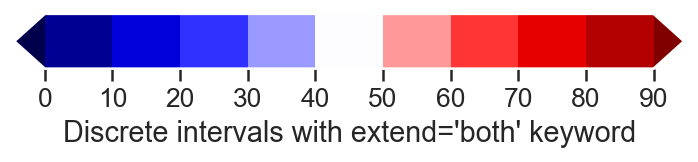

In [7]:
fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)

cmap = mpl.cm.seismic
bounds = list(range(0, 100, 10))
norm = mpl.colors.BoundaryNorm(bounds, cmap.N, extend='both')

fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             cax=ax, orientation='horizontal',
             label="Discrete intervals with extend='both' keyword")

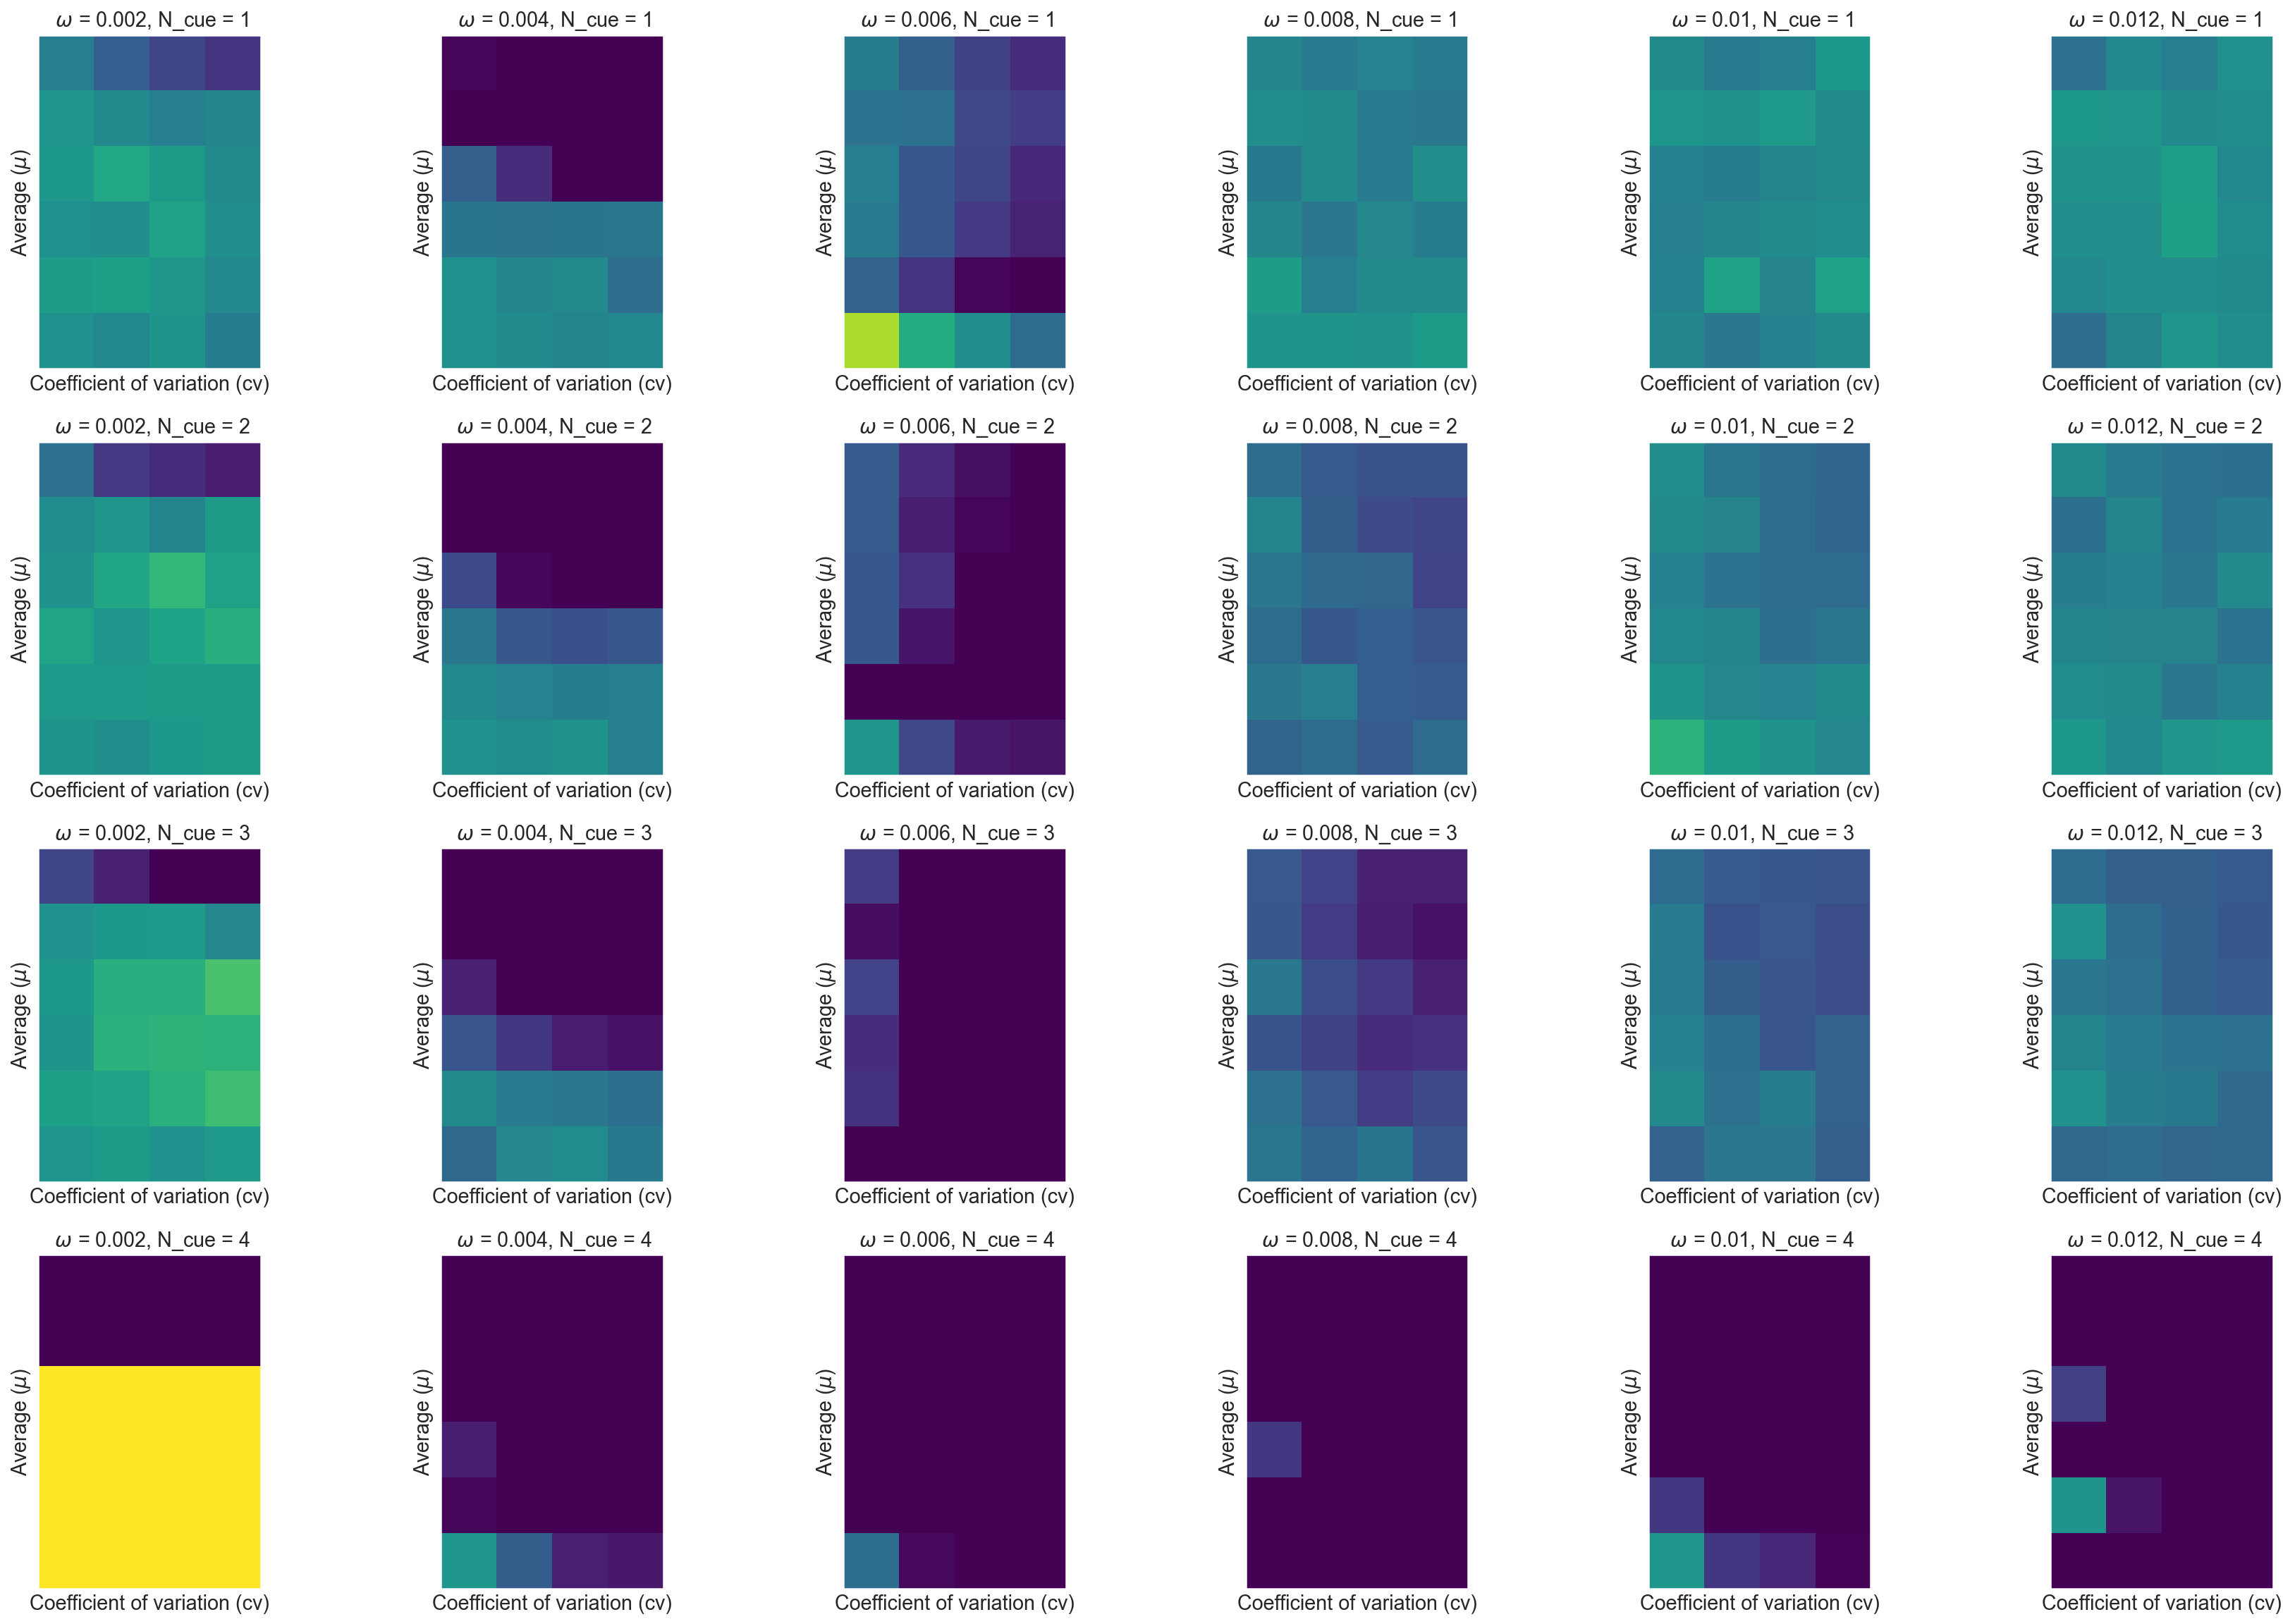

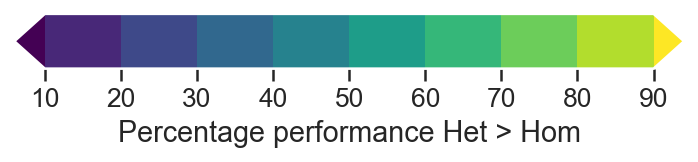

In [21]:
import seaborn as sns
import cv2
SCALE = 10

def show(img, **kwargs):
    img = np.array(img)
    plt.imshow(img, **kwargs)

def performances_to_heatmap(performances):
    #mus = np.sort(np.unique([m for m,s in performances.keys()]))
    mus = np.sort(np.unique([m for m,s in performances.keys()]))[::-1]
    stds = np.sort(np.unique([s for m,s in performances.keys()]))
    #stds = np.sort(np.unique([s for m,s in performances.keys()]))[::-1]

    heatmap = np.zeros((len(mus), len(stds)))

    for mui, mu in enumerate(mus):
        for stdi, std in enumerate(stds):
            perf = performances[(mu, std)]

            if perf is not None and perf is not np.nan:
                heatmap[mui, stdi] = perf

    return heatmap, mus, stds

#nb_switch = 2
#nb_bias = 4

#set_size(12, 12)

#for si, nb_switch in enumerate([2, 4, 6]):
    #for bi, nb_bias in enumerate([1, 2, 3, 4]):
        #plt.subplot(4, 3, si + 1 + bi * 3)
        #performances = get_performances(nb_switch, nb_bias)


#set_size(16, 16)

#for si, nb_switch in enumerate([2, 4, 6, 8]):
    #for bi, nb_bias in enumerate([1, 2, 3, 4]):
        #plt.subplot(4, 4, si + 1 + bi * 4)
        #performances = get_performances(nb_switch, nb_bias)
        
set_size(24, 24)
T = 2000

#for si, nb_switch in enumerate([4, 6, 8, 10, 12, 14]):
for si, nb_switch in enumerate([4, 8, 12, 16, 20, 24]):
#for si, nb_switch in enumerate([0.002, 0.003, 0.004, 0.005, 0.006, 0.007]):
    for bi, nb_bias in enumerate([1, 2, 3, 4]):
        plt.subplot(6, 6, si + 1 + bi * 6)
        performances = get_performances2(nb_switch, nb_bias)

        h, xs, ys = performances_to_heatmap(performances)
        #h = cv2.resize(h, (2048, 2048), interpolation=cv2.INTER_CUBIC)
        show(h, cmap='viridis', vmin=10, vmax=90)
        plt.xlabel('Coefficient of variation (cv)')
        plt.ylabel('Average ($\mu$)')
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.title(f" $\omega$ = {round(nb_switch/T, 3)}, N_cue = {nb_bias}")

plt.gcf().patch.set_facecolor('white')
plt.tight_layout()
#plt.savefig('C:/Users/aless/OneDrive/Desktop/TESI/immagini paper cogsci/immagine.png', dpi=300, bbox_inches='tight', pad_inches=0.5, facecolor=fig.get_facecolor())
plt.show()

fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5, hspace = 0.9)

cmap = plt.get_cmap('viridis')
bounds = list(range(10, 100, 10))
norm = mpl.colors.BoundaryNorm(bounds, cmap.N, extend='both')

#fig, ax = plt.subplots(figsize=(10, 1))
fig.patch.set_facecolor('white')
fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             cax=ax, orientation='horizontal',
             label="Percentage performance Het > Hom")
#fig.savefig('C:/Users/aless/OneDrive/Desktop/TESI/immagini paper cogsci/immagine1.png', dpi=300, bbox_inches='tight', pad_inches=0.5, facecolor=fig.get_facecolor())

# Mostra il grafico se necessario
plt.show()

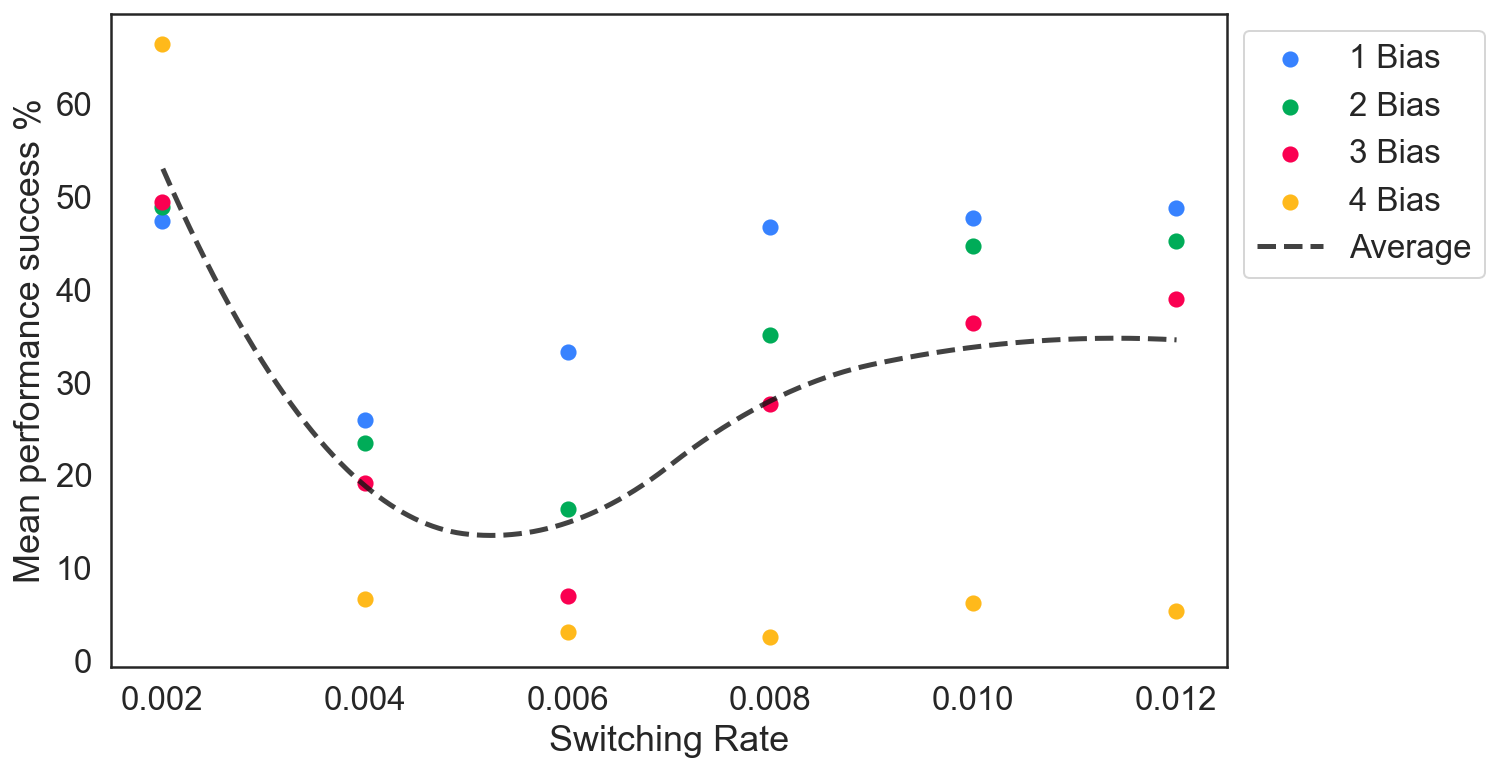

In [22]:
set_size(10, 6)
#sns.set(font_scale=1.2)
sns.set(font_scale=1.5)
sns.set_style("white")

T = 2000
points = []

for bi, nb_bias in enumerate([1, 2, 3, 4]):
    curve = []
    #for si, nb_switch in enumerate([4, 6, 8, 10, 12, 14]):
    for si, nb_switch in enumerate([4, 8, 12, 16, 20, 24]):
    #for si, nb_switch in enumerate([2, 4, 6]):
        performances = get_performances2(nb_switch, nb_bias)
        h, _, _ = performances_to_heatmap(performances)
        h[h < 0.0] = np.nan
        #h[h < 1] = np.nan
        mean_perf = np.nanmean(h)

        if nb_switch == 24:
        #if nb_switch == 6:
            l = f"{nb_bias} Bias"
        else:
            l = None

        plt.scatter(round(nb_switch/T,3), mean_perf, color=cmaps[bi](1.0), s=50, label=l)
        points.append((round(nb_switch/T,3), mean_perf))
        curve.append((round(nb_switch/T,3), mean_perf))
  #plt.plot(*zip(*curve), color=plt.cm.viridis(nb_bias/4.0), linewidth=1.0, linestyle="--", alpha=0.4)

plt.xlabel('Switching Rate')
plt.ylabel('Mean performance success %')
#plt.xticks([0.002, 0.003, 0.004, 0.005, 0.006, 0.007])
plt.xticks([0.002, 0.004, 0.006, 0.008, 0.01, 0.012])
#plt.xticks([4, 6, 8, 10, 12, 14])
#plt.xticks([2, 4, 6])


points = np.array(points)
avg = [np.mean(points[0::6, 1]), np.mean(points[1::6, 1]), np.mean(points[2::6, 1]), np.mean(points[3::6, 1]), np.mean(points[4::6, 1]), np.mean(points[5::6, 1])]
#avg = [np.mean(points[0::4, 1]), np.mean(points[1::4, 1]), np.mean(points[2::4, 1]), np.mean(points[3::4, 1])]
#avg = [np.mean(points[0::3, 1]), np.mean(points[1::3, 1]), np.mean(points[2::3, 1])]

#xx, yy = smooth([0.002, 0.003, 0.004, 0.005, 0.006, 0.007], avg)
xx, yy = smooth([0.002, 0.004, 0.006, 0.008, 0.01, 0.012], avg)
#xx, yy = smooth([4, 6, 8, 10, 12, 14], avg)
#xx, yy = smooth([2, 4, 6], avg)
#plt.plot(xx, yy, color="#EC407A", linewidth=3.0, label="Average", linestyle="--", alpha=0.8)
plt.plot(xx, yy, color="#131313", linewidth=2.5, label="Average", linestyle="--", alpha=0.8)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
#plt.legend()
#plt.savefig('C:/Users/aless/OneDrive/Desktop/TESI/immagini paper cogsci/immagine.png', dpi=300, bbox_inches='tight', pad_inches=0.5, facecolor=fig.get_facecolor())
plt.show()

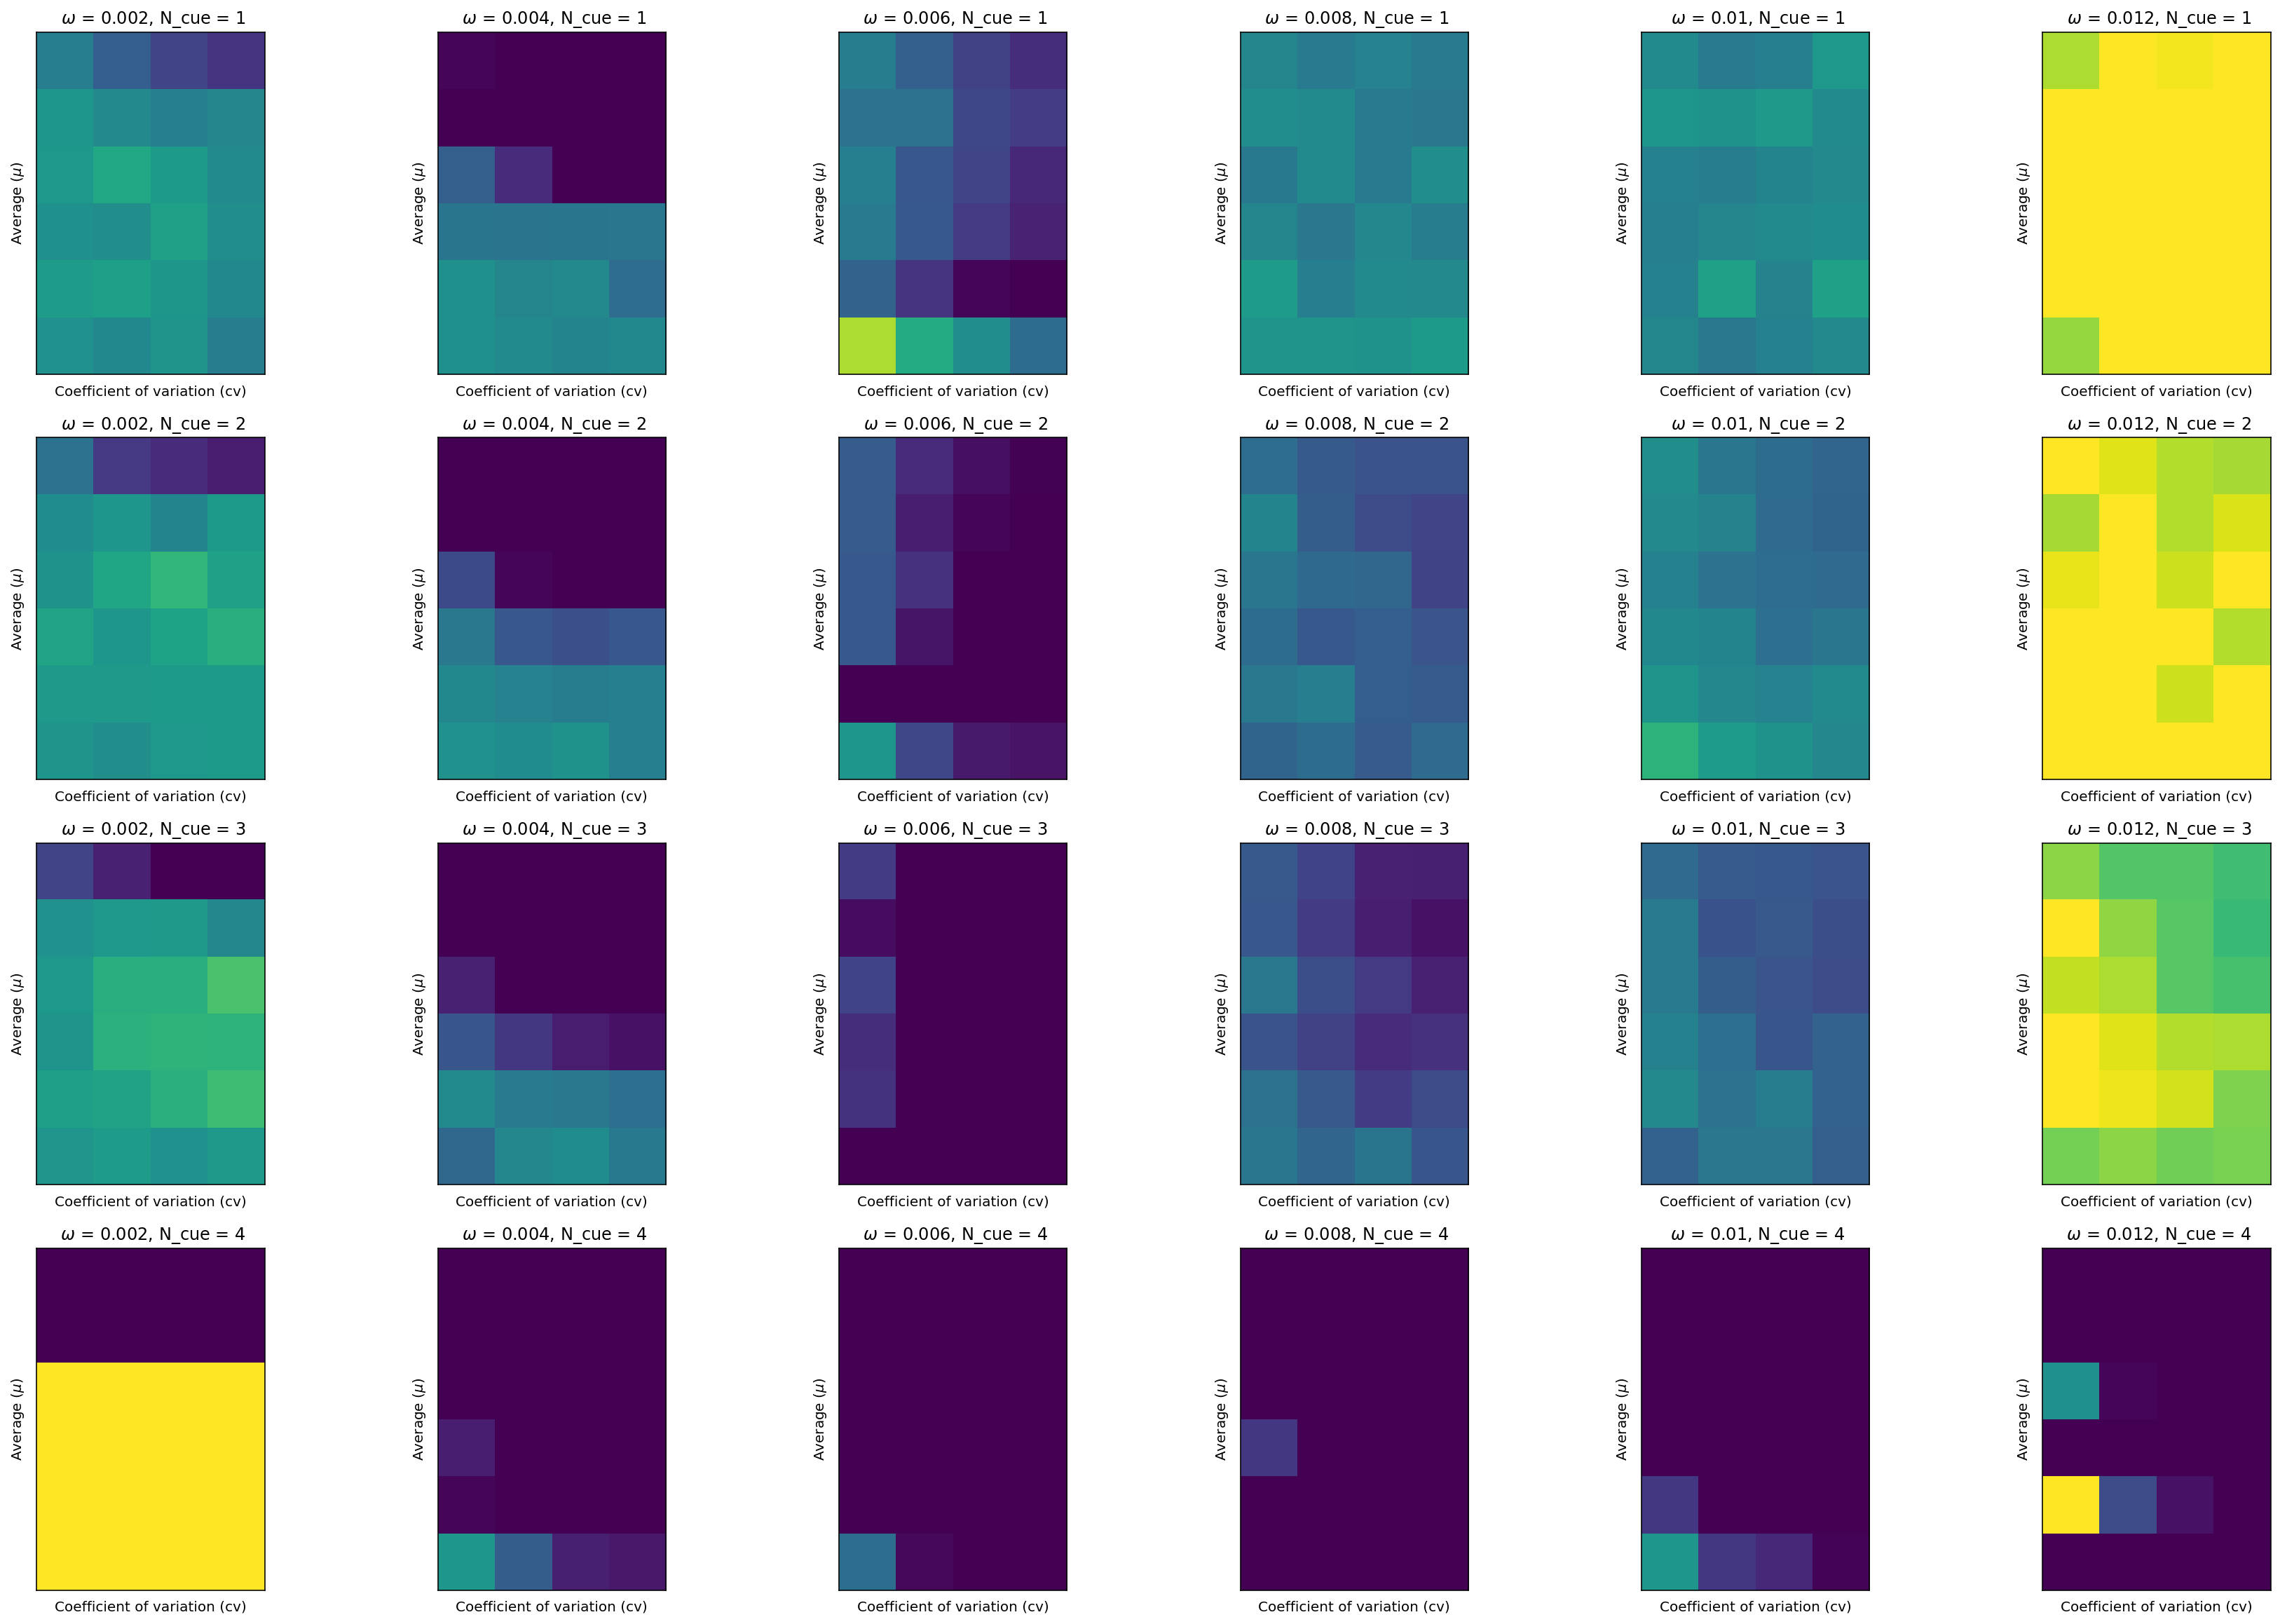

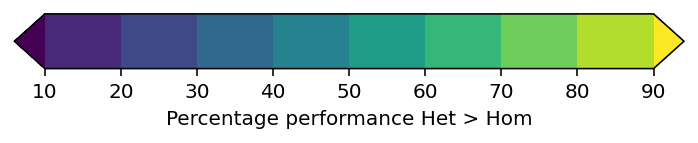

In [11]:
import seaborn as sns
import cv2
SCALE = 10

def show(img, **kwargs):
    img = np.array(img)
    plt.imshow(img, **kwargs)

def performances_to_heatmap(performances):
    #mus = np.sort(np.unique([m for m,s in performances.keys()]))
    mus = np.sort(np.unique([m for m,s in performances.keys()]))[::-1]
    stds = np.sort(np.unique([s for m,s in performances.keys()]))
    #stds = np.sort(np.unique([s for m,s in performances.keys()]))[::-1]

    heatmap = np.zeros((len(mus), len(stds)))

    for mui, mu in enumerate(mus):
        for stdi, std in enumerate(stds):
            perf = performances[(mu, std)]

            if perf is not None and perf is not np.nan:
                heatmap[mui, stdi] = perf

    return heatmap, mus, stds

#nb_switch = 2
#nb_bias = 4

#set_size(12, 12)

#for si, nb_switch in enumerate([2, 4, 6]):
    #for bi, nb_bias in enumerate([1, 2, 3, 4]):
        #plt.subplot(4, 3, si + 1 + bi * 3)
        #performances = get_performances(nb_switch, nb_bias)


#set_size(16, 16)

#for si, nb_switch in enumerate([2, 4, 6, 8]):
    #for bi, nb_bias in enumerate([1, 2, 3, 4]):
        #plt.subplot(4, 4, si + 1 + bi * 4)
        #performances = get_performances(nb_switch, nb_bias)
        
set_size(24, 24)
T = 2000

#for si, nb_switch in enumerate([4, 6, 8, 10, 12, 14]):
for si, nb_switch in enumerate([4, 8, 12, 16, 20, 24]):
#for si, nb_switch in enumerate([0.002, 0.003, 0.004, 0.005, 0.006, 0.007]):
    for bi, nb_bias in enumerate([1, 2, 3, 4]):
        plt.subplot(6, 6, si + 1 + bi * 6)
        performances = get_performances(nb_switch, nb_bias)

        h, xs, ys = performances_to_heatmap(performances)
        #h = cv2.resize(h, (2048, 2048), interpolation=cv2.INTER_CUBIC)
        show(h, cmap='viridis', vmin=10, vmax=90)
        plt.xlabel('Coefficient of variation (cv)')
        plt.ylabel('Average ($\mu$)')
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.title(f" $\omega$ = {round(nb_switch/T, 3)}, N_cue = {nb_bias}")

plt.gcf().patch.set_facecolor('white')
plt.tight_layout()
#plt.savefig('C:/Users/aless/OneDrive/Desktop/TESI/immagini paper cogsci/immagine.png', dpi=300, bbox_inches='tight', pad_inches=0.5, facecolor=fig.get_facecolor())
plt.show()

fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5, hspace = 0.9)

cmap = plt.get_cmap('viridis')
bounds = list(range(10, 100, 10))
norm = mpl.colors.BoundaryNorm(bounds, cmap.N, extend='both')

#fig, ax = plt.subplots(figsize=(10, 1))
fig.patch.set_facecolor('white')
fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             cax=ax, orientation='horizontal',
             label="Percentage performance Het > Hom")
#fig.savefig('C:/Users/aless/OneDrive/Desktop/TESI/immagini paper cogsci/immagine1.png', dpi=300, bbox_inches='tight', pad_inches=0.5, facecolor=fig.get_facecolor())

# Mostra il grafico se necessario
plt.show()

non so se vmin = 0 o meglio 10

Average increases from down to up - 
cv increases from left to right

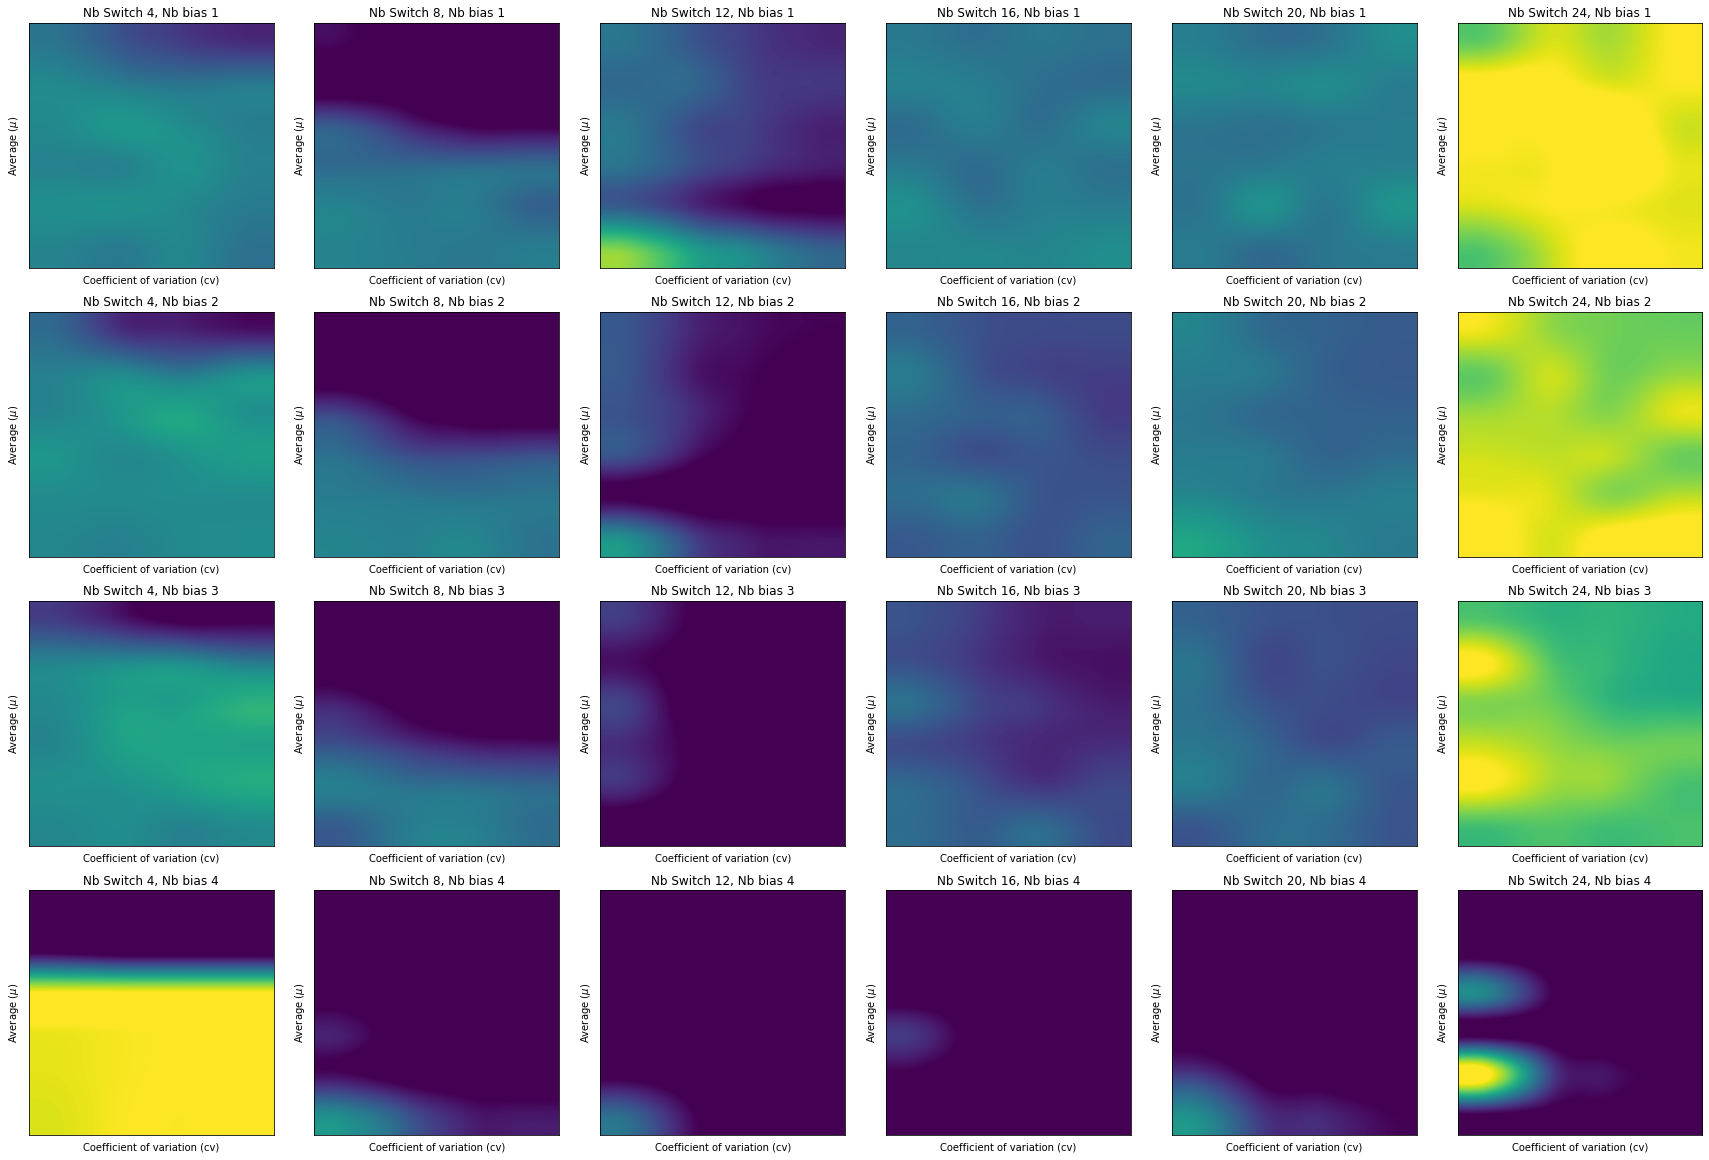

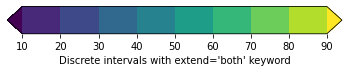

In [4]:
import seaborn as sns
import cv2
SCALE = 10

def show(img, **kwargs):
    img = np.array(img)
    plt.imshow(img, **kwargs)

def performances_to_heatmap(performances):
    #mus = np.sort(np.unique([m for m,s in performances.keys()]))
    mus = np.sort(np.unique([m for m,s in performances.keys()]))[::-1]
    stds = np.sort(np.unique([s for m,s in performances.keys()]))
    #stds = np.sort(np.unique([s for m,s in performances.keys()]))[::-1]

    heatmap = np.zeros((len(mus), len(stds)))

    for mui, mu in enumerate(mus):
        for stdi, std in enumerate(stds):
            perf = performances[(mu, std)]

            if perf is not None and perf is not np.nan:
                heatmap[mui, stdi] = perf

    return heatmap, mus, stds

nb_switch = 2
nb_bias = 4

#set_size(12, 12)

#for si, nb_switch in enumerate([2, 4, 6]):
    #for bi, nb_bias in enumerate([1, 2, 3, 4]):
        #plt.subplot(4, 3, si + 1 + bi * 3)
        #performances = get_performances(nb_switch, nb_bias)


#set_size(16, 16)

#for si, nb_switch in enumerate([2, 4, 6, 8]):
    #for bi, nb_bias in enumerate([1, 2, 3, 4]):
        #plt.subplot(4, 4, si + 1 + bi * 4)
        #performances = get_performances(nb_switch, nb_bias)ù
        
set_size(24, 24)

#for si, nb_switch in enumerate([4, 6, 8, 10, 12, 14]):
for si, nb_switch in enumerate([4, 8, 12, 16, 20, 24]):
    for bi, nb_bias in enumerate([1, 2, 3, 4]):
        plt.subplot(6, 6, si + 1 + bi * 6)
        performances = get_performances(nb_switch, nb_bias)

        h, xs, ys = performances_to_heatmap(performances)
        h = cv2.resize(h, (2048, 2048), interpolation=cv2.INTER_CUBIC)
        show(h, cmap='viridis', vmin=10, vmax=100)
        plt.xlabel('Coefficient of variation (cv)')
        plt.ylabel('Average ($\mu$)')
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.title(f"Nb Switch {nb_switch}, Nb bias {nb_bias}")

plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)

cmap = plt.get_cmap('viridis')
bounds = list(range(10, 100, 10))
norm = mpl.colors.BoundaryNorm(bounds, cmap.N, extend='both')

fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             cax=ax, orientation='horizontal',
             label="Discrete intervals with extend='both' keyword")

In [12]:
from scipy import interpolate
from scipy.interpolate import UnivariateSpline

eps = 1e-12


def smooth(x, y, nb_points=1000, order=2, sf=1):
    x = np.array(x).astype(np.float64)
    y = np.array(y).astype(np.float64)
    # trick to avoid duplicate
    x += np.random.uniform(low=1e-6, high=1e-5, size=x.shape)
    y += np.random.uniform(low=1e-6, high=1e-5, size=x.shape)

    # sort by x
    ind = np.argsort(x)
    x = x[ind]
    y = y[ind]

    #f = UnivariateSpline(x, y, k=order)
    f = interpolate.interp1d(x, y, kind='quadratic')
    #f.set_smoothing_factor(sf)
    #f = interpolate.lagrange(x, y)
    #f = interpolate.BarycentricInterpolator(x, y)
    u = np.linspace(x.min()+eps, x.max()-eps, nb_points)

    return u, f(u)

the function smooths the input data by interpolating a quadratic curve through the original data points and generating a new set of points along this smoothed curve. This can be useful for visualizing trends in the data and reducing noise.

In [13]:
def get_alpha_cmap(cmap):
    
    if isinstance(cmap, str):
        cmap = plt.get_cmap(cmap)
    else:
        c = np.array((cmap[0]/255.0, cmap[1]/255.0, cmap[2]/255.0))

        cmax = colorsys.rgb_to_hls(*c)
        cmax = np.array(cmax)
        cmax[-1] = 1.0

        cmax = np.clip(np.array(colorsys.hls_to_rgb(*cmax)), 0, 1)
        #cmax = np.clip(c * 1.2, 0, 1)
        cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", [c,cmax])

    alpha_cmap = cmap(np.arange(256))
    alpha_cmap[:,-1] = np.linspace(0, 1.0, 256)
    alpha_cmap = ListedColormap(alpha_cmap)

    return alpha_cmap

slack_blue  = get_alpha_cmap((54, 197, 240))
slack_green = get_alpha_cmap((46, 182, 125))
slack_red   = get_alpha_cmap((210, 40, 95))
slack_yellow = get_alpha_cmap((236, 178, 46))
slack_violet = get_alpha_cmap((84, 25, 85))

google_blue = get_alpha_cmap((66, 133, 244))
google_red = get_alpha_cmap((219, 68, 55))
google_yellow= get_alpha_cmap((244, 180, 0))
google_green = get_alpha_cmap((15, 157, 88))

deep_purple = get_alpha_cmap((103, 58, 183))
pink = get_alpha_cmap((236, 64, 122))
anthracite = get_alpha_cmap((42, 72, 88))

#cmaps = [google_blue, slack_green, google_red, slack_yellow, slack_violet, deep_purple, pink, anthracite]
cmaps = [google_blue, google_green, slack_red, slack_yellow]
colors = ['#0C5DA5', '#00B945', '#FF9500', '#FF2C00', '#845B97', '#474747', '#9e9e9e']

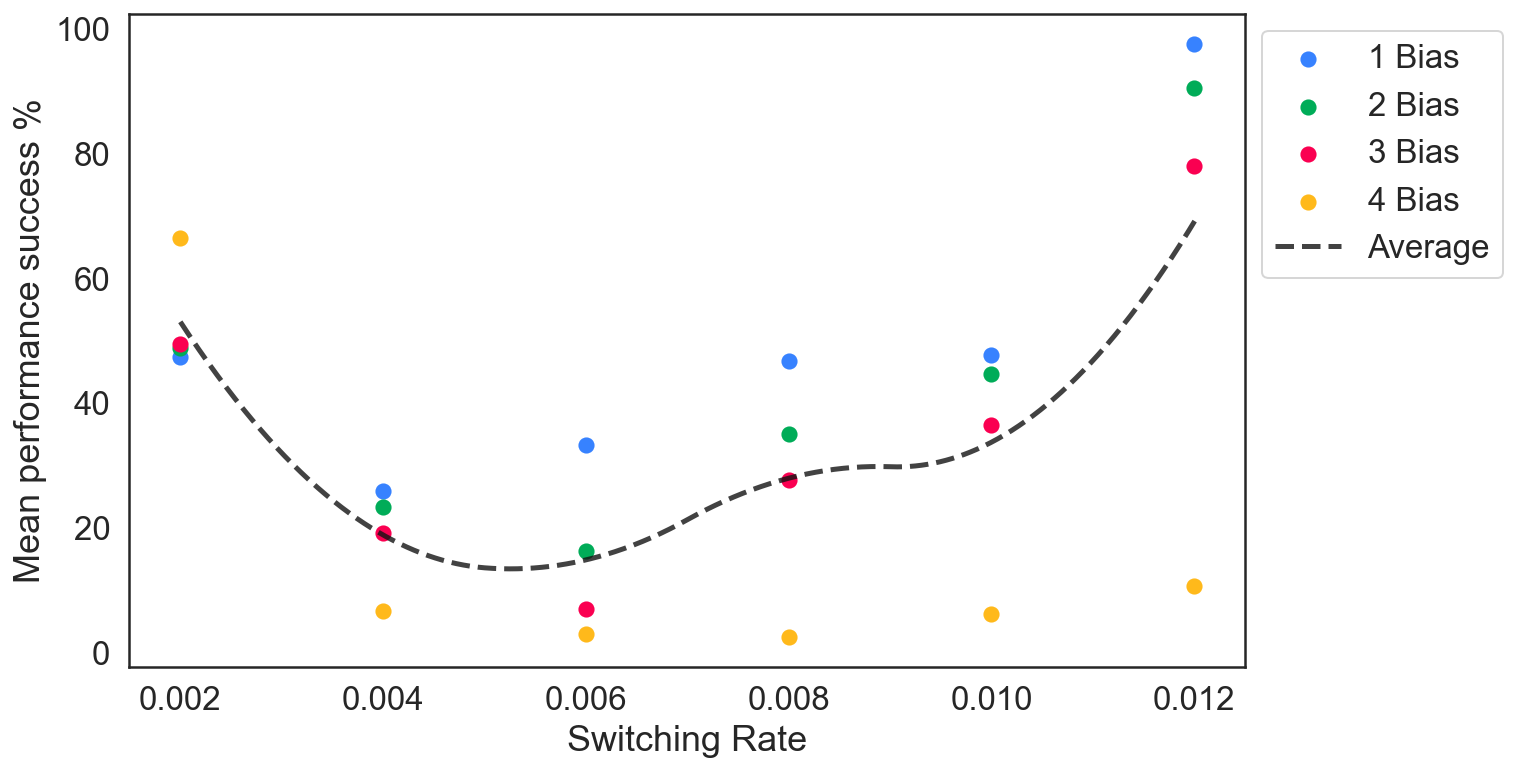

In [14]:
set_size(10, 6)
#sns.set(font_scale=1.2)
sns.set(font_scale=1.5)
sns.set_style("white")

T = 2000
points = []

for bi, nb_bias in enumerate([1, 2, 3, 4]):
    curve = []
    #for si, nb_switch in enumerate([4, 6, 8, 10, 12, 14]):
    for si, nb_switch in enumerate([4, 8, 12, 16, 20, 24]):
    #for si, nb_switch in enumerate([2, 4, 6]):
        performances = get_performances(nb_switch, nb_bias)
        h, _, _ = performances_to_heatmap(performances)
        h[h < 0.0] = np.nan
        #h[h < 1] = np.nan
        mean_perf = np.nanmean(h)

        if nb_switch == 24:
        #if nb_switch == 6:
            l = f"{nb_bias} Bias"
        else:
            l = None

        plt.scatter(round(nb_switch/T,3), mean_perf, color=cmaps[bi](1.0), s=50, label=l)
        points.append((round(nb_switch/T,3), mean_perf))
        curve.append((round(nb_switch/T,3), mean_perf))
  #plt.plot(*zip(*curve), color=plt.cm.viridis(nb_bias/4.0), linewidth=1.0, linestyle="--", alpha=0.4)

plt.xlabel('Switching Rate')
plt.ylabel('Mean performance success %')
#plt.xticks([0.002, 0.003, 0.004, 0.005, 0.006, 0.007])
plt.xticks([0.002, 0.004, 0.006, 0.008, 0.01, 0.012])
#plt.xticks([4, 6, 8, 10, 12, 14])
#plt.xticks([2, 4, 6])


points = np.array(points)
avg = [np.mean(points[0::6, 1]), np.mean(points[1::6, 1]), np.mean(points[2::6, 1]), np.mean(points[3::6, 1]), np.mean(points[4::6, 1]), np.mean(points[5::6, 1])]
#avg = [np.mean(points[0::4, 1]), np.mean(points[1::4, 1]), np.mean(points[2::4, 1]), np.mean(points[3::4, 1])]
#avg = [np.mean(points[0::3, 1]), np.mean(points[1::3, 1]), np.mean(points[2::3, 1])]

#xx, yy = smooth([0.002, 0.003, 0.004, 0.005, 0.006, 0.007], avg)
xx, yy = smooth([0.002, 0.004, 0.006, 0.008, 0.01, 0.012], avg)
#xx, yy = smooth([4, 6, 8, 10, 12, 14], avg)
#xx, yy = smooth([2, 4, 6], avg)
#plt.plot(xx, yy, color="#EC407A", linewidth=3.0, label="Average", linestyle="--", alpha=0.8)
plt.plot(xx, yy, color="#131313", linewidth=2.5, label="Average", linestyle="--", alpha=0.8)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
#plt.legend()
#plt.savefig('C:/Users/aless/OneDrive/Desktop/TESI/immagini paper cogsci/immagine.png', dpi=300, bbox_inches='tight', pad_inches=0.5, facecolor=fig.get_facecolor())
plt.show()

([<matplotlib.axis.XTick at 0x18b28f70e80>,
 [Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3'), Text(4, 0, '4')])

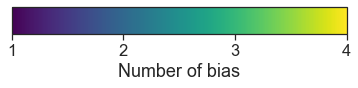

In [9]:
fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)

cmap = plt.get_cmap('viridis')
norm = mpl.colors.CenteredNorm(vcenter=2.5, halfrange=1.5)

fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             cax=ax, orientation='horizontal',
             label="Number of bias")
plt.xticks([1, 2, 3, 4])

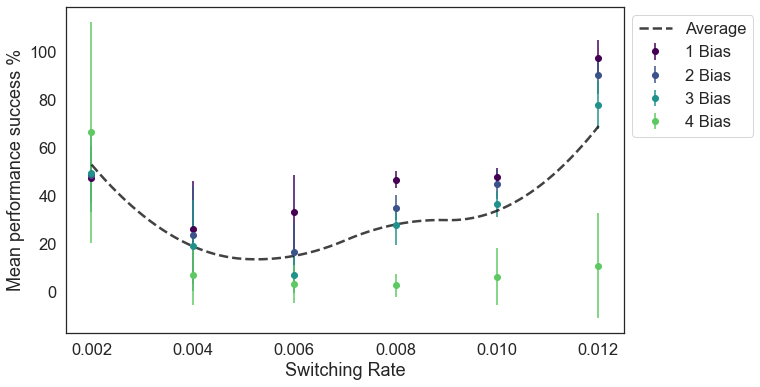

In [10]:
#set_size(8, 4)
#sns.set(font_scale=1.2)
set_size(10, 6)
sns.set(font_scale=1.5)
sns.set_style("white")

T = 2000
points = []

for bi, nb_bias in enumerate([1, 2, 3, 4]):
    curve = []
    #for si, nb_switch in enumerate([4, 6, 8, 10, 12, 14]):
    for si, nb_switch in enumerate([4, 8, 12, 16, 20, 24]):
    #for si, nb_switch in enumerate([2, 4, 6]):
        performances = get_performances(nb_switch, nb_bias)
        h, _, _ = performances_to_heatmap(performances)
        h[h < 0.0] = np.nan
        #h[h < 1] = np.nan
        mean_perf = np.nanmean(h)

        if nb_switch == 24:
        #if nb_switch == 6:
            l = f"{nb_bias} Bias"
        else:
            l = None
        
        std_dev = np.nanstd(h)
        
        #plt.scatter(round(nb_switch/T,3), mean_perf, color=cmaps[bi](1.0), s=50, label=l)
        plt.errorbar(round(nb_switch / T, 3), mean_perf, yerr=std_dev, fmt='o', color=plt.cm.viridis(bi / 4.0), label=l)
        points.append((round(nb_switch/T,3), mean_perf))
        curve.append((round(nb_switch/T,3), mean_perf))
  #plt.plot(*zip(*curve), color=plt.cm.viridis(nb_bias/4.0), linewidth=1.0, linestyle="--", alpha=0.4)

plt.xlabel('Switching Rate')
plt.ylabel('Mean performance success %')
#plt.xticks([0.002, 0.003, 0.004, 0.005, 0.006, 0.007])
plt.xticks([0.002, 0.004, 0.006, 0.008, 0.01, 0.012])
#plt.xticks([4, 6, 8, 10, 12, 14])
#plt.xticks([2, 4, 6])


points = np.array(points)
avg = [np.mean(points[0::6, 1]), np.mean(points[1::6, 1]), np.mean(points[2::6, 1]), np.mean(points[3::6, 1]), np.mean(points[4::6, 1]), np.mean(points[5::6, 1])]
#avg = [np.mean(points[0::4, 1]), np.mean(points[1::4, 1]), np.mean(points[2::4, 1]), np.mean(points[3::4, 1])]
#avg = [np.mean(points[0::3, 1]), np.mean(points[1::3, 1]), np.mean(points[2::3, 1])]

#xx, yy = smooth([0.002, 0.003, 0.004, 0.005, 0.006, 0.007], avg)
xx, yy = smooth([0.002, 0.004, 0.006, 0.008, 0.01, 0.012], avg)
#xx, yy = smooth([4, 6, 8, 10, 12, 14], avg)
#xx, yy = smooth([2, 4, 6], avg)
#plt.plot(xx, yy, color="#EC407A", linewidth=3.0, label="Average", linestyle="--", alpha=0.8)
plt.plot(xx, yy, color="#131313", linewidth=2.5, label="Average", linestyle="--", alpha=0.8)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
#plt.savefig('C:/Users/aless/OneDrive/Desktop/TESI/immagini paper cogsci/immagine.png', dpi=300, bbox_inches='tight', pad_inches=0.5, facecolor=fig.get_facecolor())
#plt.legend()
plt.show()

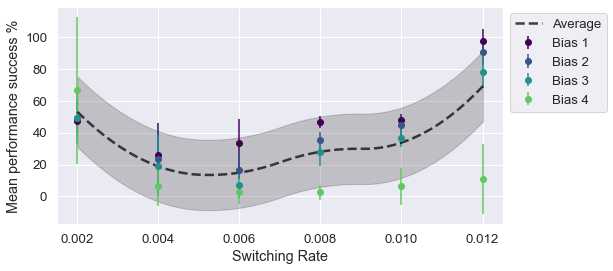

In [10]:
set_size(8, 4)
sns.set(font_scale=1.2)

T = 2000
points = []

for bi, nb_bias in enumerate([1, 2, 3, 4]):
    curve = []
    #for si, nb_switch in enumerate([4, 6, 8, 10, 12, 14]):
    for si, nb_switch in enumerate([4, 8, 12, 16, 20, 24]):
    #for si, nb_switch in enumerate([2, 4, 6]):
        performances = get_performances(nb_switch, nb_bias)
        h, _, _ = performances_to_heatmap(performances)
        h[h < 0.0] = np.nan
        #h[h < 1] = np.nan
        mean_perf = np.nanmean(h)

        if nb_switch == 24:
        #if nb_switch == 6:
            l = f"Bias {nb_bias}"
        else:
            l = None
        
        std_dev = np.nanstd(h)
        
        #plt.scatter(round(nb_switch/T,3), mean_perf, color=cmaps[bi](1.0), s=50, label=l)
        plt.errorbar(round(nb_switch / T, 3), mean_perf, yerr=std_dev, fmt='o', color=plt.cm.viridis(bi / 4.0), label=l)
        points.append((round(nb_switch/T,3), mean_perf))
        curve.append((round(nb_switch/T,3), mean_perf))
  #plt.plot(*zip(*curve), color=plt.cm.viridis(nb_bias/4.0), linewidth=1.0, linestyle="--", alpha=0.4)

plt.xlabel('Switching Rate')
plt.ylabel('Mean performance success %')
#plt.xticks([0.002, 0.003, 0.004, 0.005, 0.006, 0.007])
plt.xticks([0.002, 0.004, 0.006, 0.008, 0.01, 0.012])
#plt.xticks([4, 6, 8, 10, 12, 14])
#plt.xticks([2, 4, 6])


points = np.array(points)
avg = [np.mean(points[0::6, 1]), np.mean(points[1::6, 1]), np.mean(points[2::6, 1]), np.mean(points[3::6, 1]), np.mean(points[4::6, 1]), np.mean(points[5::6, 1])]
#avg = [np.mean(points[0::4, 1]), np.mean(points[1::4, 1]), np.mean(points[2::4, 1]), np.mean(points[3::4, 1])]
#avg = [np.mean(points[0::3, 1]), np.mean(points[1::3, 1]), np.mean(points[2::3, 1])]

#xx, yy = smooth([0.002, 0.003, 0.004, 0.005, 0.006, 0.007], avg)
xx, yy = smooth([0.002, 0.004, 0.006, 0.008, 0.01, 0.012], avg)
#xx, yy = smooth([4, 6, 8, 10, 12, 14], avg)
#xx, yy = smooth([2, 4, 6], avg)
#plt.plot(xx, yy, color="#EC407A", linewidth=3.0, label="Average", linestyle="--", alpha=0.8)
plt.plot(xx, yy, color="#131313", linewidth=2.5, label="Average", linestyle="--", alpha=0.8)
plt.fill_between(xx, np.subtract(yy, std_dev), np.add(yy, std_dev), color="#131313", alpha=0.2)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

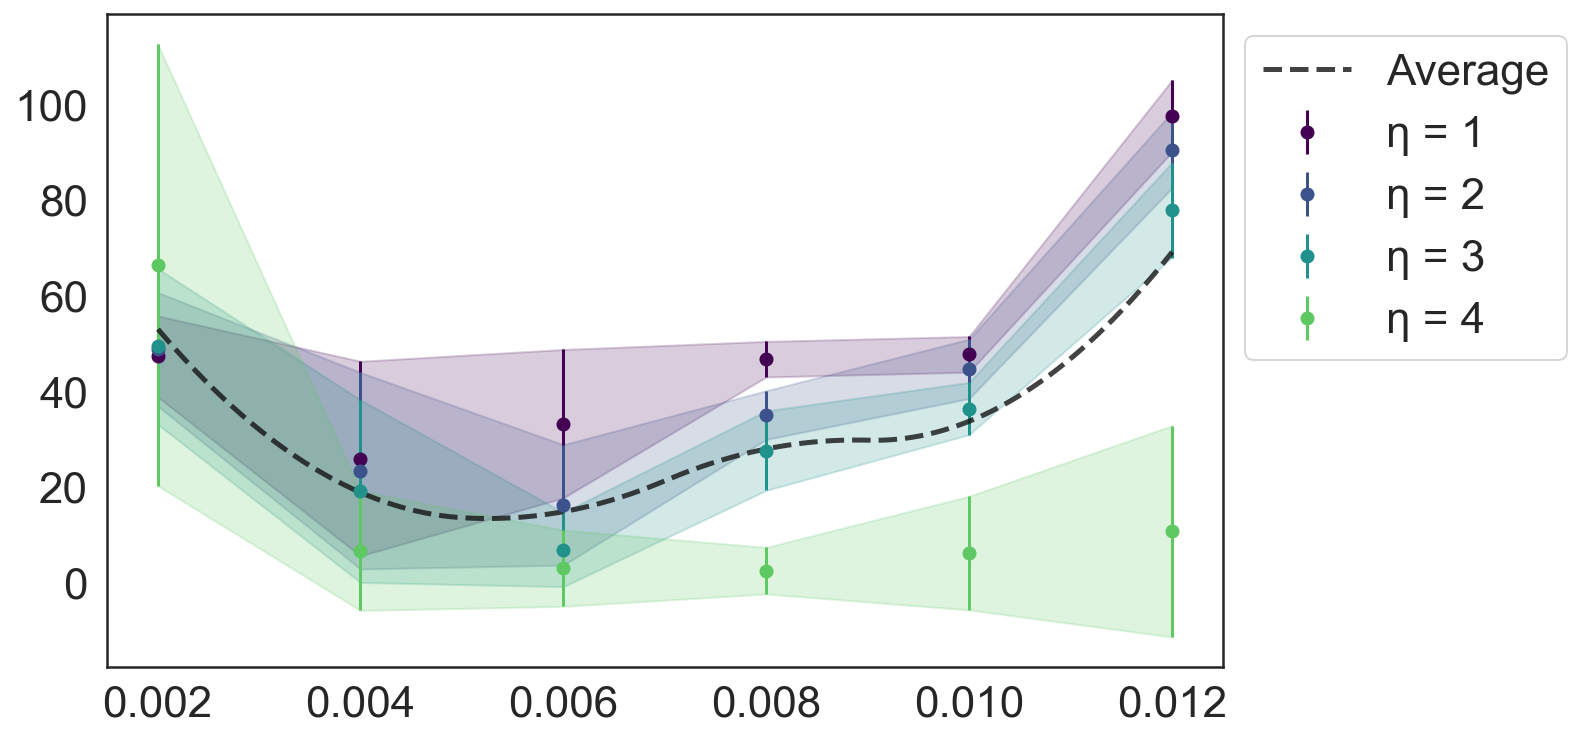

In [18]:
#set_size(8, 4)
#sns.set(font_scale=1.2)
set_size(10, 6)
sns.set(font_scale=2.0)
sns.set_style("white")

T = 2000
points = []
# Lists to store data for fill_between
x_fill = {1: [], 2: [], 3: [], 4: []}
y_fill = {1: [], 2: [], 3: [], 4: []}
upper_fill = {1: [], 2: [], 3: [], 4: []}
lower_fill = {1: [], 2: [], 3: [], 4: []}

eta = '\u03b7'


for bi, nb_bias in enumerate([1, 2, 3, 4]):
    curve = []
    #for si, nb_switch in enumerate([4, 6, 8, 10, 12, 14]):
    for si, nb_switch in enumerate([4, 8, 12, 16, 20, 24]):
    #for si, nb_switch in enumerate([2, 4, 6]):
        performances = get_performances(nb_switch, nb_bias)
        h, _, _ = performances_to_heatmap(performances)
        h[h < 0.0] = np.nan
        #h[h < 1] = np.nan
        mean_perf = np.nanmean(h)

        if nb_switch == 24:
        #if nb_switch == 6:
            l = f"\u03b7 = {nb_bias}"
        else:
            l = None
        
        std_dev = np.nanstd(h)
        
        # Append data for fill_between
        x_fill[nb_bias].append(round(nb_switch / T, 3))
        y_fill[nb_bias].append(mean_perf)
        upper_fill[nb_bias].append(mean_perf + std_dev)
        lower_fill[nb_bias].append(mean_perf - std_dev)
        
        # Plot data points
        #plt.plot(round(nb_switch / T, 3), mean_perf, 'o', color=plt.cm.viridis(bi / 4.0), label=l)
        #plt.scatter(round(nb_switch/T,3), mean_perf, color=cmaps[bi](1.0), s=50, label=l)
        plt.fill_between([round(nb_switch / T, 3)], [mean_perf - std_dev], [mean_perf + std_dev], color=plt.cm.viridis(bi / 4.0), alpha=0.2)
        plt.errorbar(round(nb_switch / T, 3), mean_perf, yerr=std_dev, fmt='o', color=plt.cm.viridis(bi / 4.0), label=l)
        #plt.fill_between([round(nb_switch / T, 3)], [mean_perf - std_dev], [mean_perf + std_dev], color=plt.cm.viridis(bi / 4.0), alpha=0.2)
        points.append((round(nb_switch/T,3), mean_perf))
        curve.append((round(nb_switch/T,3), mean_perf))
  #plt.plot(*zip(*curve), color=plt.cm.viridis(nb_bias/4.0), linewidth=1.0, linestyle="--", alpha=0.4)

#plt.xlabel('Switching Rate')
#plt.ylabel('Mean performance success %')
#plt.xticks([0.002, 0.003, 0.004, 0.005, 0.006, 0.007])
plt.xticks([0.002, 0.004, 0.006, 0.008, 0.01, 0.012])
#plt.xticks([4, 6, 8, 10, 12, 14])
#plt.xticks([2, 4, 6])


points = np.array(points)
avg = [np.mean(points[0::6, 1]), np.mean(points[1::6, 1]), np.mean(points[2::6, 1]), np.mean(points[3::6, 1]), np.mean(points[4::6, 1]), np.mean(points[5::6, 1])]
#avg = [np.mean(points[0::4, 1]), np.mean(points[1::4, 1]), np.mean(points[2::4, 1]), np.mean(points[3::4, 1])]
#avg = [np.mean(points[0::3, 1]), np.mean(points[1::3, 1]), np.mean(points[2::3, 1])]

#xx, yy = smooth([0.002, 0.003, 0.004, 0.005, 0.006, 0.007], avg)
xx, yy = smooth([0.002, 0.004, 0.006, 0.008, 0.01, 0.012], avg)
# Use fill_between for each set of data
for nb_bias in [1, 2, 3, 4]:
    plt.fill_between(x_fill[nb_bias], upper_fill[nb_bias], lower_fill[nb_bias], color=plt.cm.viridis((nb_bias-1) / 4.0), alpha=0.2)
#xx, yy = smooth([4, 6, 8, 10, 12, 14], avg)
#xx, yy = smooth([2, 4, 6], avg)
#plt.plot(xx, yy, color="#EC407A", linewidth=3.0, label="Average", linestyle="--", alpha=0.8)
plt.plot(xx, yy, color="#131313", linewidth=2.5, label="Average", linestyle="--", alpha=0.8)
#plt.fill_between(xx, np.subtract(yy, std_dev), np.add(yy, std_dev), color="#131313", alpha=0.2)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
#plt.savefig('C:/Users/aless/OneDrive/Desktop/TESI/immagini paper cogsci/immagine.png', dpi=400, bbox_inches='tight', pad_inches=0.5, facecolor=fig.get_facecolor())
plt.show()

## Mean performance value

In [4]:
def set_size(w,h):
    """Set matplot figure size"""
    plt.rcParams["figure.figsize"] = [w,h]

def get_performances(nb_switch, nb_bias):
    
    f = f"C:/Users/aless/TESI/03.Data_new_solver/Hom_vs_Het_t_regular_4_to_24_saving_distrb/{nb_switch}_task_sw_{nb_bias}_biases.csv"  # name of the files
    d = pd.read_csv(f)

    mus = np.unique(d['mu'])    
    stds = np.unique(d['cv'])   # based on what we use for the simulation

    performances = {}

    for mu in mus:
        for std in stds:
            performances[(mu, std)] = get_performance(nb_switch, nb_bias, mu, std)

    return performances

def get_performance(nb_switch, nb_bias, mu = None, std = None):
    
    f = f"C:/Users/aless/TESI/03.Data_new_solver/Hom_vs_Het_t_regular_4_to_24_saving_distrb/{nb_switch}_task_sw_{nb_bias}_biases.csv"
    d = pd.read_csv(f)

    if mu is not None:
        d = d[d['mu'] == mu]
    if std is not None:
        d = d[d['cv'] == std]

    #print(nb_switch, nb_bias, mu, std, np.mean(d['performance1_het_mean']))
    return np.mean(d['performance1_het_mean'])

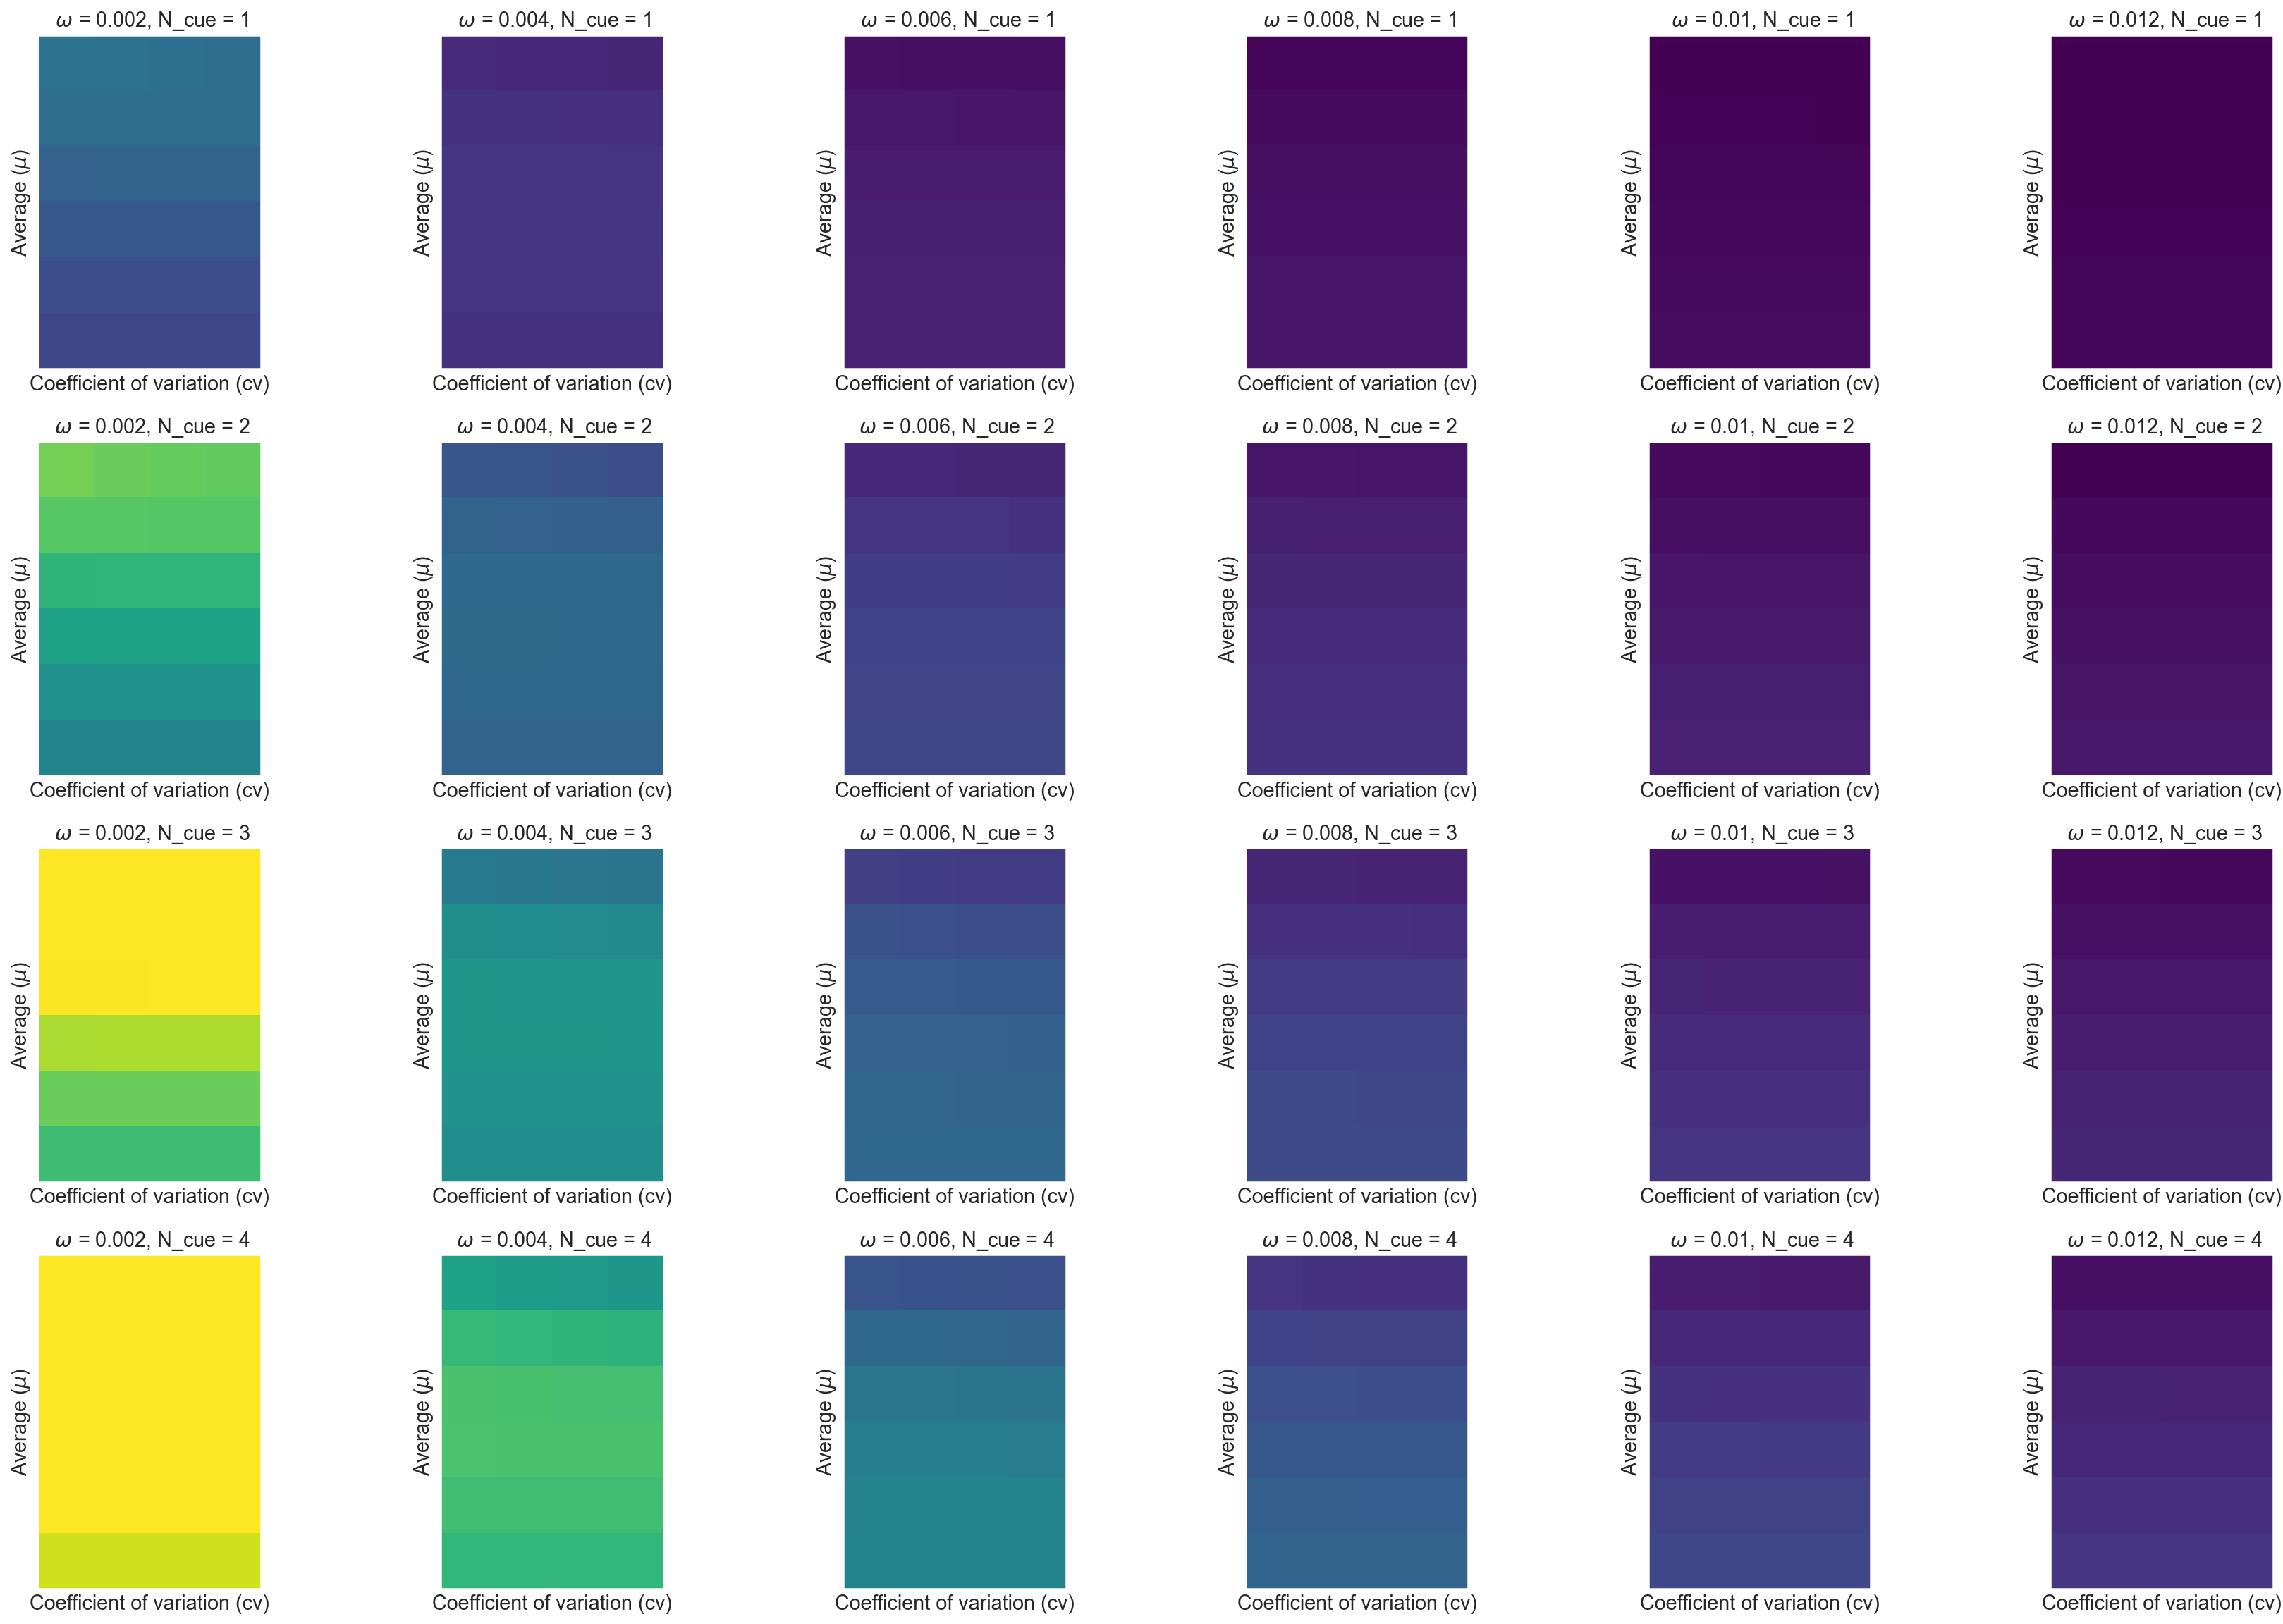

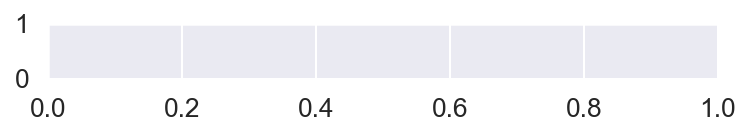

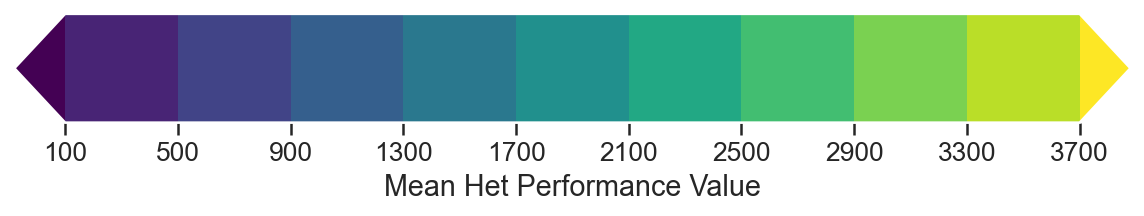

In [9]:
import seaborn as sns
import cv2
SCALE = 10
#sns.set(font_scale=1.2)

def show(img, **kwargs):
    img = np.array(img)
    plt.imshow(img, **kwargs)

def performances_to_heatmap(performances):
    #mus = np.sort(np.unique([m for m,s in performances.keys()]))
    mus = np.sort(np.unique([m for m,s in performances.keys()]))[::-1]
    stds = np.sort(np.unique([s for m,s in performances.keys()]))
    #stds = np.sort(np.unique([s for m,s in performances.keys()]))[::-1]

    heatmap = np.zeros((len(mus), len(stds)))

    for mui, mu in enumerate(mus):
        for stdi, std in enumerate(stds):
            perf = performances[(mu, std)]

            if perf is not None and perf is not np.nan:
                heatmap[mui, stdi] = perf

    return heatmap, mus, stds

#nb_switch = 2
#nb_bias = 4

#set_size(12, 12)

#for si, nb_switch in enumerate([2, 4, 6]):
    #for bi, nb_bias in enumerate([1, 2, 3, 4]):
        #plt.subplot(4, 3, si + 1 + bi * 3)
        #performances = get_performances(nb_switch, nb_bias)


#set_size(16, 16)

#for si, nb_switch in enumerate([2, 4, 6, 8]):
    #for bi, nb_bias in enumerate([1, 2, 3, 4]):
        #plt.subplot(4, 4, si + 1 + bi * 4)
        #performances = get_performances(nb_switch, nb_bias)
        
set_size(24, 24)
T = 2000

#for si, nb_switch in enumerate([4, 6, 8, 10, 12, 14]):
for si, nb_switch in enumerate([4, 8, 12, 16, 20, 24]):
#for si, nb_switch in enumerate([0.002, 0.003, 0.004, 0.005, 0.006, 0.007]):
    for bi, nb_bias in enumerate([1, 2, 3, 4]):
        plt.subplot(6, 6, si + 1 + bi * 6)
        performances = get_performances(nb_switch, nb_bias)

        h, xs, ys = performances_to_heatmap(performances)
        #h = cv2.resize(h, (2048, 2048), interpolation=cv2.INTER_CUBIC)
        show(h, cmap='viridis', vmin=100, vmax=3900)
        plt.xlabel('Coefficient of variation (cv)')
        plt.ylabel('Average ($\mu$)')
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.title(f" $\omega$ = {round(nb_switch/T, 3)}, N_cue = {nb_bias}")

plt.gcf().patch.set_facecolor('white')
plt.tight_layout()
#plt.savefig('C:/Users/aless/OneDrive/Desktop/TESI/immagini paper cogsci/immagine.png', dpi=300, bbox_inches='tight', pad_inches=0.5, facecolor=fig.get_facecolor())
plt.show()

fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5, hspace = 0.9)

cmap = plt.get_cmap('viridis')
bounds = list(range(100, 4000, 400))
norm = mpl.colors.BoundaryNorm(bounds, cmap.N, extend='both')

fig, ax = plt.subplots(figsize=(10, 1))
fig.patch.set_facecolor('white')
fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             cax=ax, orientation='horizontal',
             label="Mean Het Performance Value")
fig.savefig('C:/Users/aless/OneDrive/Desktop/TESI/immagini paper cogsci/immagine1.png', dpi=300, bbox_inches='tight', pad_inches=0.5, facecolor=fig.get_facecolor())

# Mostra il grafico se necessario
plt.show()

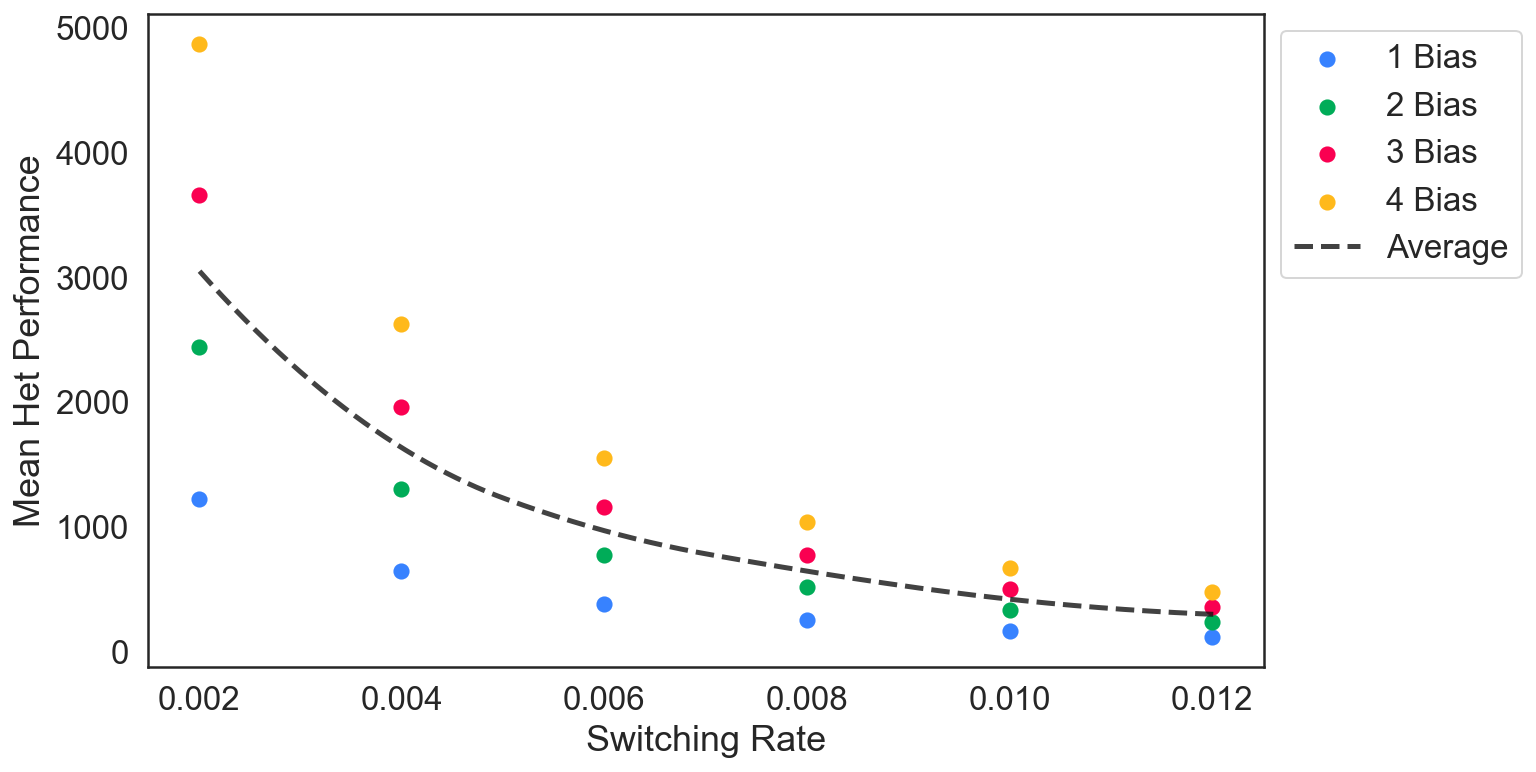

In [22]:
set_size(10, 6)
#sns.set(font_scale=1.2)
sns.set(font_scale=1.5)
sns.set_style("white")

T = 2000
points = []

for bi, nb_bias in enumerate([1, 2, 3, 4]):
    curve = []
    #for si, nb_switch in enumerate([4, 6, 8, 10, 12, 14]):
    for si, nb_switch in enumerate([4, 8, 12, 16, 20, 24]):
    #for si, nb_switch in enumerate([2, 4, 6]):
        performances = get_performances(nb_switch, nb_bias)
        h, _, _ = performances_to_heatmap(performances)
        h[h < 0.0] = np.nan
        #h[h < 1] = np.nan
        mean_perf = np.nanmean(h)

        if nb_switch == 24:
        #if nb_switch == 6:
            l = f"{nb_bias} Bias"
        else:
            l = None

        plt.scatter(round(nb_switch/T,3), mean_perf, color=cmaps[bi](1.0), s=50, label=l)
        points.append((round(nb_switch/T,3), mean_perf))
        curve.append((round(nb_switch/T,3), mean_perf))
  #plt.plot(*zip(*curve), color=plt.cm.viridis(nb_bias/4.0), linewidth=1.0, linestyle="--", alpha=0.4)

plt.xlabel('Switching Rate')
plt.ylabel('Mean Het Performance')
#plt.xticks([0.002, 0.003, 0.004, 0.005, 0.006, 0.007])
plt.xticks([0.002, 0.004, 0.006, 0.008, 0.01, 0.012])
#plt.xticks([4, 6, 8, 10, 12, 14])
#plt.xticks([2, 4, 6])


points = np.array(points)
avg = [np.mean(points[0::6, 1]), np.mean(points[1::6, 1]), np.mean(points[2::6, 1]), np.mean(points[3::6, 1]), np.mean(points[4::6, 1]), np.mean(points[5::6, 1])]
#avg = [np.mean(points[0::4, 1]), np.mean(points[1::4, 1]), np.mean(points[2::4, 1]), np.mean(points[3::4, 1])]
#avg = [np.mean(points[0::3, 1]), np.mean(points[1::3, 1]), np.mean(points[2::3, 1])]

#xx, yy = smooth([0.002, 0.003, 0.004, 0.005, 0.006, 0.007], avg)
xx, yy = smooth([0.002, 0.004, 0.006, 0.008, 0.01, 0.012], avg)
#xx, yy = smooth([4, 6, 8, 10, 12, 14], avg)
#xx, yy = smooth([2, 4, 6], avg)
#plt.plot(xx, yy, color="#EC407A", linewidth=3.0, label="Average", linestyle="--", alpha=0.8)
plt.plot(xx, yy, color="#131313", linewidth=2.5, label="Average", linestyle="--", alpha=0.8)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
#plt.legend()
#plt.savefig('C:/Users/aless/OneDrive/Desktop/TESI/immagini paper cogsci/immagine.png', dpi=300, bbox_inches='tight', pad_inches=0.5, facecolor=fig.get_facecolor())
plt.show()

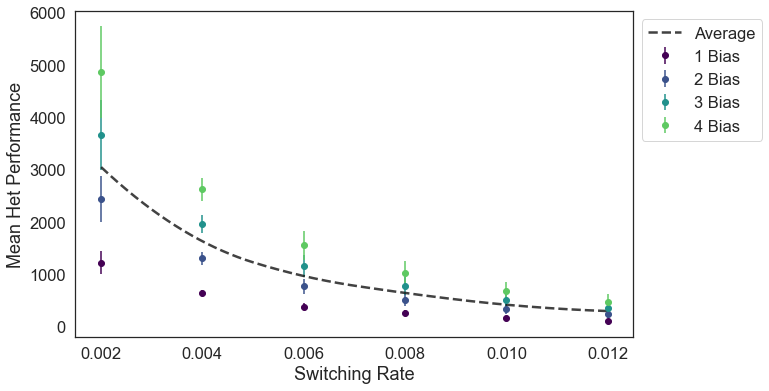

In [10]:
#set_size(8, 4)
#sns.set(font_scale=1.2)
set_size(10, 6)
sns.set(font_scale=1.5)
sns.set_style("white")

T = 2000
points = []

for bi, nb_bias in enumerate([1, 2, 3, 4]):
    curve = []
    #for si, nb_switch in enumerate([4, 6, 8, 10, 12, 14]):
    for si, nb_switch in enumerate([4, 8, 12, 16, 20, 24]):
    #for si, nb_switch in enumerate([2, 4, 6]):
        performances = get_performances(nb_switch, nb_bias)
        h, _, _ = performances_to_heatmap(performances)
        h[h < 0.0] = np.nan
        #h[h < 1] = np.nan
        mean_perf = np.nanmean(h)

        if nb_switch == 24:
        #if nb_switch == 6:
            l = f"{nb_bias} Bias"
        else:
            l = None
        
        std_dev = np.nanstd(h)
        
        #plt.scatter(round(nb_switch/T,3), mean_perf, color=cmaps[bi](1.0), s=50, label=l)
        plt.errorbar(round(nb_switch / T, 3), mean_perf, yerr=std_dev, fmt='o', color=plt.cm.viridis(bi / 4.0), label=l)
        points.append((round(nb_switch/T,3), mean_perf))
        curve.append((round(nb_switch/T,3), mean_perf))
  #plt.plot(*zip(*curve), color=plt.cm.viridis(nb_bias/4.0), linewidth=1.0, linestyle="--", alpha=0.4)

plt.xlabel('Switching Rate')
plt.ylabel('Mean Het Performance')
#plt.xticks([0.002, 0.003, 0.004, 0.005, 0.006, 0.007])
plt.xticks([0.002, 0.004, 0.006, 0.008, 0.01, 0.012])
#plt.xticks([4, 6, 8, 10, 12, 14])
#plt.xticks([2, 4, 6])


points = np.array(points)
avg = [np.mean(points[0::6, 1]), np.mean(points[1::6, 1]), np.mean(points[2::6, 1]), np.mean(points[3::6, 1]), np.mean(points[4::6, 1]), np.mean(points[5::6, 1])]
#avg = [np.mean(points[0::4, 1]), np.mean(points[1::4, 1]), np.mean(points[2::4, 1]), np.mean(points[3::4, 1])]
#avg = [np.mean(points[0::3, 1]), np.mean(points[1::3, 1]), np.mean(points[2::3, 1])]

#xx, yy = smooth([0.002, 0.003, 0.004, 0.005, 0.006, 0.007], avg)
xx, yy = smooth([0.002, 0.004, 0.006, 0.008, 0.01, 0.012], avg)
#xx, yy = smooth([4, 6, 8, 10, 12, 14], avg)
#xx, yy = smooth([2, 4, 6], avg)
#plt.plot(xx, yy, color="#EC407A", linewidth=3.0, label="Average", linestyle="--", alpha=0.8)
plt.plot(xx, yy, color="#131313", linewidth=2.5, label="Average", linestyle="--", alpha=0.8)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
#plt.savefig('C:/Users/aless/OneDrive/Desktop/TESI/immagini paper cogsci/immagine.png', dpi=300, bbox_inches='tight', pad_inches=0.5, facecolor=fig.get_facecolor())
#plt.legend()
plt.show()

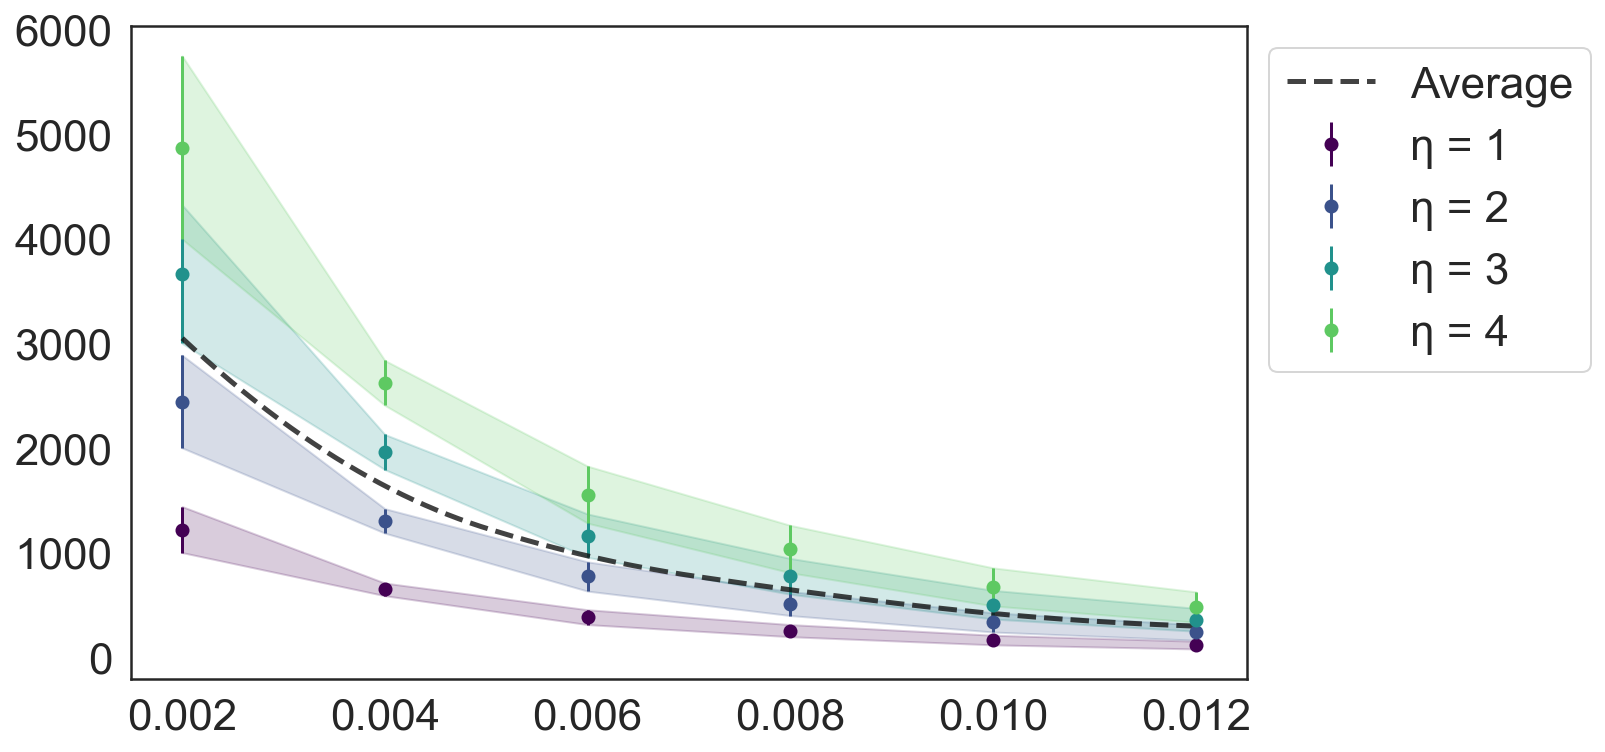

In [24]:
#set_size(8, 4)
#sns.set(font_scale=1.2)
set_size(10, 6)
sns.set(font_scale=2.0)
sns.set_style("white")

T = 2000
points = []
# Lists to store data for fill_between
x_fill = {1: [], 2: [], 3: [], 4: []}
y_fill = {1: [], 2: [], 3: [], 4: []}
upper_fill = {1: [], 2: [], 3: [], 4: []}
lower_fill = {1: [], 2: [], 3: [], 4: []}


for bi, nb_bias in enumerate([1, 2, 3, 4]):
    curve = []
    #for si, nb_switch in enumerate([4, 6, 8, 10, 12, 14]):
    for si, nb_switch in enumerate([4, 8, 12, 16, 20, 24]):
    #for si, nb_switch in enumerate([2, 4, 6]):
        performances = get_performances(nb_switch, nb_bias)
        h, _, _ = performances_to_heatmap(performances)
        h[h < 0.0] = np.nan
        #h[h < 1] = np.nan
        mean_perf = np.nanmean(h)

        if nb_switch == 24:
        #if nb_switch == 6:
            l = f"\u03b7 = {nb_bias}"
        else:
            l = None
        
        std_dev = np.nanstd(h)
        
        # Append data for fill_between
        x_fill[nb_bias].append(round(nb_switch / T, 3))
        y_fill[nb_bias].append(mean_perf)
        upper_fill[nb_bias].append(mean_perf + std_dev)
        lower_fill[nb_bias].append(mean_perf - std_dev)
        
        # Plot data points
        #plt.plot(round(nb_switch / T, 3), mean_perf, 'o', color=plt.cm.viridis(bi / 4.0), label=l)
        #plt.scatter(round(nb_switch/T,3), mean_perf, color=cmaps[bi](1.0), s=50, label=l)
        plt.fill_between([round(nb_switch / T, 3)], [mean_perf - std_dev], [mean_perf + std_dev], color=plt.cm.viridis(bi / 4.0), alpha=0.2)
        plt.errorbar(round(nb_switch / T, 3), mean_perf, yerr=std_dev, fmt='o', color=plt.cm.viridis(bi / 4.0), label=l)
        #plt.fill_between([round(nb_switch / T, 3)], [mean_perf - std_dev], [mean_perf + std_dev], color=plt.cm.viridis(bi / 4.0), alpha=0.2)
        points.append((round(nb_switch/T,3), mean_perf))
        curve.append((round(nb_switch/T,3), mean_perf))
  #plt.plot(*zip(*curve), color=plt.cm.viridis(nb_bias/4.0), linewidth=1.0, linestyle="--", alpha=0.4)

#plt.xlabel('Switching Rate')
#plt.ylabel('Mean Het Performance')
#plt.xticks([0.002, 0.003, 0.004, 0.005, 0.006, 0.007])
plt.xticks([0.002, 0.004, 0.006, 0.008, 0.01, 0.012])
#plt.xticks([4, 6, 8, 10, 12, 14])
#plt.xticks([2, 4, 6])


points = np.array(points)
avg = [np.mean(points[0::6, 1]), np.mean(points[1::6, 1]), np.mean(points[2::6, 1]), np.mean(points[3::6, 1]), np.mean(points[4::6, 1]), np.mean(points[5::6, 1])]
#avg = [np.mean(points[0::4, 1]), np.mean(points[1::4, 1]), np.mean(points[2::4, 1]), np.mean(points[3::4, 1])]
#avg = [np.mean(points[0::3, 1]), np.mean(points[1::3, 1]), np.mean(points[2::3, 1])]

#xx, yy = smooth([0.002, 0.003, 0.004, 0.005, 0.006, 0.007], avg)
xx, yy = smooth([0.002, 0.004, 0.006, 0.008, 0.01, 0.012], avg)
# Use fill_between for each set of data
for nb_bias in [1, 2, 3, 4]:
    plt.fill_between(x_fill[nb_bias], upper_fill[nb_bias], lower_fill[nb_bias], color=plt.cm.viridis((nb_bias-1) / 4.0), alpha=0.2)
#xx, yy = smooth([4, 6, 8, 10, 12, 14], avg)
#xx, yy = smooth([2, 4, 6], avg)
#plt.plot(xx, yy, color="#EC407A", linewidth=3.0, label="Average", linestyle="--", alpha=0.8)
plt.plot(xx, yy, color="#131313", linewidth=2.5, label="Average", linestyle="--", alpha=0.8)
#plt.fill_between(xx, np.subtract(yy, std_dev), np.add(yy, std_dev), color="#131313", alpha=0.2)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.savefig('C:/Users/aless/OneDrive/Desktop/TESI/immagini paper cogsci/immagine2.png', dpi=400, bbox_inches='tight', pad_inches=0.5, facecolor=fig.get_facecolor())
plt.show()

#### Hom and Het case combined:

In [13]:
def get_performances1(nb_switch, nb_bias):
    
    f = f"C:/Users/aless/TESI/03.Data_new_solver/Hom_vs_Het_t_regular_4_to_24_saving_distrb/{nb_switch}_task_sw_{nb_bias}_biases.csv"  # name of the files
    d = pd.read_csv(f)

    mus = np.unique(d['mu'])    
    stds = np.unique(d['cv'])   # based on what we use for the simulation

    performances = {}

    for mu in mus:
        for std in stds:
            performances[(mu, std)] = get_performance1(nb_switch, nb_bias, mu, std)

    return performances

def get_performance1(nb_switch, nb_bias, mu = None, std = None):
    
    f = f"C:/Users/aless/TESI/03.Data_new_solver/Hom_vs_Het_t_regular_4_to_24_saving_distrb/{nb_switch}_task_sw_{nb_bias}_biases.csv"
    d = pd.read_csv(f)

    if mu is not None:
        d = d[d['mu'] == mu]
    if std is not None:
        d = d[d['cv'] == std]

    return np.mean(d['performance1_hom'])

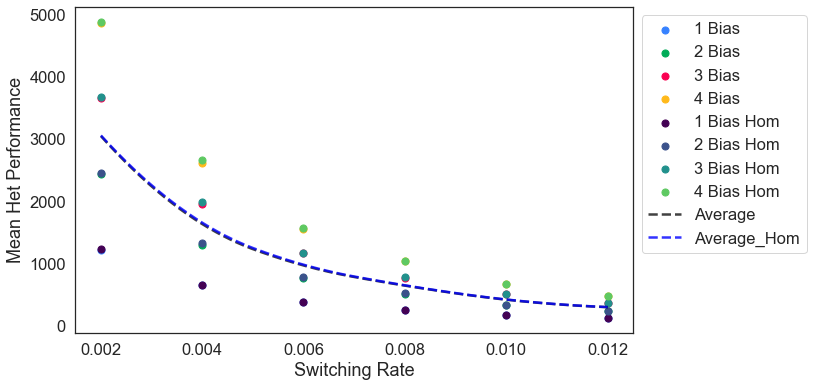

In [17]:
set_size(10, 6)
#sns.set(font_scale=1.2)
sns.set(font_scale=1.5)
sns.set_style("white")

T = 2000
points = []
points1 = []

#het case
for bi, nb_bias in enumerate([1, 2, 3, 4]):
    curve = []
    #for si, nb_switch in enumerate([4, 6, 8, 10, 12, 14]):
    for si, nb_switch in enumerate([4, 8, 12, 16, 20, 24]):
    #for si, nb_switch in enumerate([2, 4, 6]):
        performances = get_performances(nb_switch, nb_bias)
        h, _, _ = performances_to_heatmap(performances)
        h[h < 0.0] = np.nan
        #h[h < 1] = np.nan
        mean_perf = np.nanmean(h)

        if nb_switch == 24:
        #if nb_switch == 6:
            l = f"{nb_bias} Bias"
        else:
            l = None

        plt.scatter(round(nb_switch/T,3), mean_perf, color=cmaps[bi](1.0), s=50, label=l)
        points.append((round(nb_switch/T,3), mean_perf))
        curve.append((round(nb_switch/T,3), mean_perf))

#hom case
for bi, nb_bias in enumerate([1, 2, 3, 4]):
    curve1 = []
    #for si, nb_switch in enumerate([4, 6, 8, 10, 12, 14]):
    for si, nb_switch in enumerate([4, 8, 12, 16, 20, 24]):
    #for si, nb_switch in enumerate([2, 4, 6]):
        performances1 = get_performances1(nb_switch, nb_bias)
        h1, _, _ = performances_to_heatmap(performances1)
        h1[h1 < 0.0] = np.nan
        #h[h < 1] = np.nan
        mean_perf1 = np.nanmean(h1)

        if nb_switch == 24:
        #if nb_switch == 6:
            l = f"{nb_bias} Bias Hom"
        else:
            l = None

        plt.scatter(round(nb_switch/T,3), mean_perf1, color=plt.cm.viridis(bi / 4.0), s=50, label=l)
        points1.append((round(nb_switch/T,3), mean_perf1))
        curve1.append((round(nb_switch/T,3), mean_perf1))
  #plt.plot(*zip(*curve), color=plt.cm.viridis(nb_bias/4.0), linewidth=1.0, linestyle="--", alpha=0.4)

plt.xlabel('Switching Rate')
plt.ylabel('Mean Het Performance')
#plt.xticks([0.002, 0.003, 0.004, 0.005, 0.006, 0.007])
plt.xticks([0.002, 0.004, 0.006, 0.008, 0.01, 0.012])
#plt.xticks([4, 6, 8, 10, 12, 14])
#plt.xticks([2, 4, 6])

#het
points = np.array(points)
avg = [np.mean(points[0::6, 1]), np.mean(points[1::6, 1]), np.mean(points[2::6, 1]), np.mean(points[3::6, 1]), np.mean(points[4::6, 1]), np.mean(points[5::6, 1])]
#avg = [np.mean(points[0::4, 1]), np.mean(points[1::4, 1]), np.mean(points[2::4, 1]), np.mean(points[3::4, 1])]
#avg = [np.mean(points[0::3, 1]), np.mean(points[1::3, 1]), np.mean(points[2::3, 1])]

#hom
points1 = np.array(points1)
avg1 = [np.mean(points1[0::6, 1]), np.mean(points1[1::6, 1]), np.mean(points1[2::6, 1]), np.mean(points1[3::6, 1]), np.mean(points1[4::6, 1]), np.mean(points1[5::6, 1])]

#xx, yy = smooth([0.002, 0.003, 0.004, 0.005, 0.006, 0.007], avg)
xx, yy = smooth([0.002, 0.004, 0.006, 0.008, 0.01, 0.012], avg)
xx1, yy1 = smooth([0.002, 0.004, 0.006, 0.008, 0.01, 0.012], avg1)
#xx, yy = smooth([4, 6, 8, 10, 12, 14], avg)
#xx, yy = smooth([2, 4, 6], avg)
#plt.plot(xx, yy, color="#EC407A", linewidth=3.0, label="Average", linestyle="--", alpha=0.8)
plt.plot(xx, yy, color="#131313", linewidth=2.5, label="Average", linestyle="--", alpha=0.8)
plt.plot(xx1, yy1, color="blue", linewidth=2.5, label="Average_Hom", linestyle="--", alpha=0.8)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
#plt.legend()
#plt.savefig('C:/Users/aless/OneDrive/Desktop/TESI/immagini paper cogsci/immagine.png', dpi=300, bbox_inches='tight', pad_inches=0.5, facecolor=fig.get_facecolor())
plt.show()

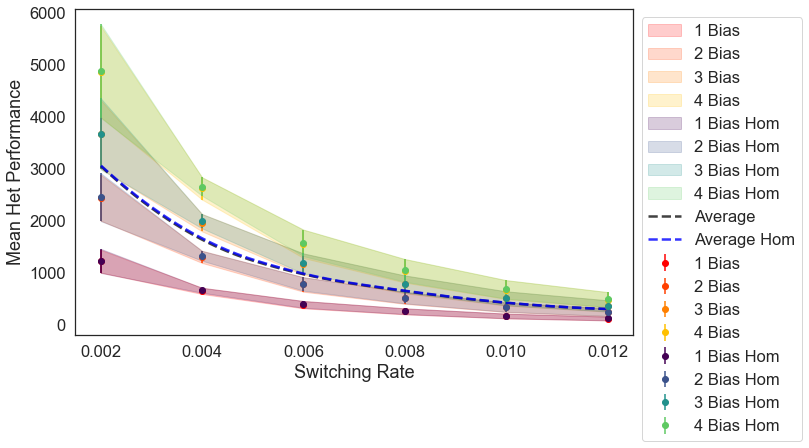

In [40]:
#set_size(8, 4)
#sns.set(font_scale=1.2)
set_size(10, 6)
sns.set(font_scale=1.5)
sns.set_style("white")

T = 2000
points = []
# Lists to store data for fill_between
x_fill = {1: [], 2: [], 3: [], 4: []}
y_fill = {1: [], 2: [], 3: [], 4: []}
upper_fill = {1: [], 2: [], 3: [], 4: []}
lower_fill = {1: [], 2: [], 3: [], 4: []}
points1 = []
# Lists to store data for fill_between
x_fill1 = {1: [], 2: [], 3: [], 4: []}
y_fill1 = {1: [], 2: [], 3: [], 4: []}
upper_fill1 = {1: [], 2: [], 3: [], 4: []}
lower_fill1 = {1: [], 2: [], 3: [], 4: []}

#het
for bi, nb_bias in enumerate([1, 2, 3, 4]):
    curve = []
    #for si, nb_switch in enumerate([4, 6, 8, 10, 12, 14]):
    for si, nb_switch in enumerate([4, 8, 12, 16, 20, 24]):
    #for si, nb_switch in enumerate([2, 4, 6]):
        performances = get_performances(nb_switch, nb_bias)
        h, _, _ = performances_to_heatmap(performances)
        h[h < 0.0] = np.nan
        #h[h < 1] = np.nan
        mean_perf = np.nanmean(h)

        if nb_switch == 24:
        #if nb_switch == 6:
            l = f"{nb_bias} Bias"
        else:
            l = None
        
        std_dev = np.nanstd(h)
        
        # Append data for fill_between
        x_fill[nb_bias].append(round(nb_switch / T, 3))
        y_fill[nb_bias].append(mean_perf)
        upper_fill[nb_bias].append(mean_perf + std_dev)
        lower_fill[nb_bias].append(mean_perf - std_dev)
        
        # Plot data points
        #plt.plot(round(nb_switch / T, 3), mean_perf, 'o', color=plt.cm.viridis(bi / 4.0), label=l)
        #plt.scatter(round(nb_switch/T,3), mean_perf, color=cmaps[bi](1.0), s=50, label=l)
        plt.fill_between([round(nb_switch / T, 3)], [mean_perf - std_dev], [mean_perf + std_dev], color=plt.cm.autumn(bi / 4.0), alpha=0.2)
        plt.errorbar(round(nb_switch / T, 3), mean_perf, yerr=std_dev, fmt='o', color=plt.cm.autumn(bi / 4.0), label=l)
        #plt.fill_between([round(nb_switch / T, 3)], [mean_perf - std_dev], [mean_perf + std_dev], color=plt.cm.viridis(bi / 4.0), alpha=0.2)
        points.append((round(nb_switch/T,3), mean_perf))
        curve.append((round(nb_switch/T,3), mean_perf))
  #plt.plot(*zip(*curve), color=plt.cm.viridis(nb_bias/4.0), linewidth=1.0, linestyle="--", alpha=0.4)

#hom
for bi, nb_bias in enumerate([1, 2, 3, 4]):
    curve1 = []
    #for si, nb_switch in enumerate([4, 6, 8, 10, 12, 14]):
    for si, nb_switch in enumerate([4, 8, 12, 16, 20, 24]):
    #for si, nb_switch in enumerate([2, 4, 6]):
        performances1 = get_performances1(nb_switch, nb_bias)
        h1, _, _ = performances_to_heatmap(performances1)
        h1[h1 < 0.0] = np.nan
        #h[h < 1] = np.nan
        mean_perf1 = np.nanmean(h1)

        if nb_switch == 24:
        #if nb_switch == 6:
            l = f"{nb_bias} Bias Hom"
        else:
            l = None
        
        std_dev1 = np.nanstd(h1)
        
        # Append data for fill_between
        x_fill1[nb_bias].append(round(nb_switch / T, 3))
        y_fill1[nb_bias].append(mean_perf1)
        upper_fill1[nb_bias].append(mean_perf1 + std_dev1)
        lower_fill1[nb_bias].append(mean_perf1 - std_dev1)
        
        # Plot data points
        #plt.plot(round(nb_switch / T, 3), mean_perf, 'o', color=plt.cm.viridis(bi / 4.0), label=l)
        #plt.scatter(round(nb_switch/T,3), mean_perf, color=cmaps[bi](1.0), s=50, label=l)
        plt.fill_between([round(nb_switch / T, 3)], [mean_perf1 - std_dev1], [mean_perf1 + std_dev1], color=plt.cm.viridis(bi / 4.0), alpha=0.2)
        plt.errorbar(round(nb_switch / T, 3), mean_perf1, yerr=std_dev1, fmt='o', color=plt.cm.viridis(bi / 4.0), label=l)
        #plt.fill_between([round(nb_switch / T, 3)], [mean_perf - std_dev], [mean_perf + std_dev], color=plt.cm.viridis(bi / 4.0), alpha=0.2)
        points1.append((round(nb_switch/T,3), mean_perf1))
        curve1.append((round(nb_switch/T,3), mean_perf1))
  #plt.plot(*zip(*curve), color=plt.cm.viridis(nb_bias/4.0), linewidth=1.0, linestyle="--", alpha=0.4)

plt.xlabel('Switching Rate')
plt.ylabel('Mean Het Performance')
#plt.xticks([0.002, 0.003, 0.004, 0.005, 0.006, 0.007])
plt.xticks([0.002, 0.004, 0.006, 0.008, 0.01, 0.012])
#plt.xticks([4, 6, 8, 10, 12, 14])
#plt.xticks([2, 4, 6])


points = np.array(points)
avg = [np.mean(points[0::6, 1]), np.mean(points[1::6, 1]), np.mean(points[2::6, 1]), np.mean(points[3::6, 1]), np.mean(points[4::6, 1]), np.mean(points[5::6, 1])]
#avg = [np.mean(points[0::4, 1]), np.mean(points[1::4, 1]), np.mean(points[2::4, 1]), np.mean(points[3::4, 1])]
#avg = [np.mean(points[0::3, 1]), np.mean(points[1::3, 1]), np.mean(points[2::3, 1])]

points1 = np.array(points1)
avg1 = [np.mean(points1[0::6, 1]), np.mean(points1[1::6, 1]), np.mean(points1[2::6, 1]), np.mean(points1[3::6, 1]), np.mean(points1[4::6, 1]), np.mean(points1[5::6, 1])]

#xx, yy = smooth([0.002, 0.003, 0.004, 0.005, 0.006, 0.007], avg)
xx, yy = smooth([0.002, 0.004, 0.006, 0.008, 0.01, 0.012], avg)
# Use fill_between for each set of data
for nb_bias in [1, 2, 3, 4]:
    plt.fill_between(x_fill[nb_bias], upper_fill[nb_bias], lower_fill[nb_bias], color=plt.cm.autumn((nb_bias-1) / 4.0), alpha=0.2, label=f'{nb_bias} Bias')
xx1, yy1 = smooth([0.002, 0.004, 0.006, 0.008, 0.01, 0.012], avg1)
# Use fill_between for each set of data
for nb_bias in [1, 2, 3, 4]:
    plt.fill_between(x_fill1[nb_bias], upper_fill1[nb_bias], lower_fill1[nb_bias], color=plt.cm.viridis((nb_bias-1) / 4.0), alpha=0.2, label=f'{nb_bias} Bias Hom')
#xx, yy = smooth([4, 6, 8, 10, 12, 14], avg)
#xx, yy = smooth([2, 4, 6], avg)
#plt.plot(xx, yy, color="#EC407A", linewidth=3.0, label="Average", linestyle="--", alpha=0.8)
plt.plot(xx, yy, color="#131313", linewidth=2.5, label="Average", linestyle="--", alpha=0.8)
plt.plot(xx1, yy1, color="blue", linewidth=2.5, label="Average Hom", linestyle="--", alpha=0.8)
#plt.fill_between(xx, np.subtract(yy, std_dev), np.add(yy, std_dev), color="#131313", alpha=0.2)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
#plt.savefig('C:/Users/aless/OneDrive/Desktop/TESI/immagini paper cogsci/immagine.png', dpi=300, bbox_inches='tight', pad_inches=0.5, facecolor=fig.get_facecolor())
plt.show()

## Standard deviation on the mean het performance value

In [42]:
def set_size(w,h):
    """Set matplot figure size"""
    plt.rcParams["figure.figsize"] = [w,h]

def get_performances(nb_switch, nb_bias):
    
    f = f"C:/Users/aless/TESI/03.Data_new_solver/Hom_vs_Het_t_regular_4_to_24_saving_distrb/{nb_switch}_task_sw_{nb_bias}_biases.csv"  # name of the files
    d = pd.read_csv(f)

    mus = np.unique(d['mu'])    
    stds = np.unique(d['cv'])   # based on what we use for the simulation

    performances = {}

    for mu in mus:
        for std in stds:
            performances[(mu, std)] = get_performance(nb_switch, nb_bias, mu, std)

    return performances

def get_performance(nb_switch, nb_bias, mu = None, std = None):
    
    f = f"C:/Users/aless/TESI/03.Data_new_solver/Hom_vs_Het_t_regular_4_to_24_saving_distrb/{nb_switch}_task_sw_{nb_bias}_biases.csv"
    d = pd.read_csv(f)

    if mu is not None:
        d = d[d['mu'] == mu]
    if std is not None:
        d = d[d['cv'] == std]

    return np.mean(d['performance1_het_dev'])

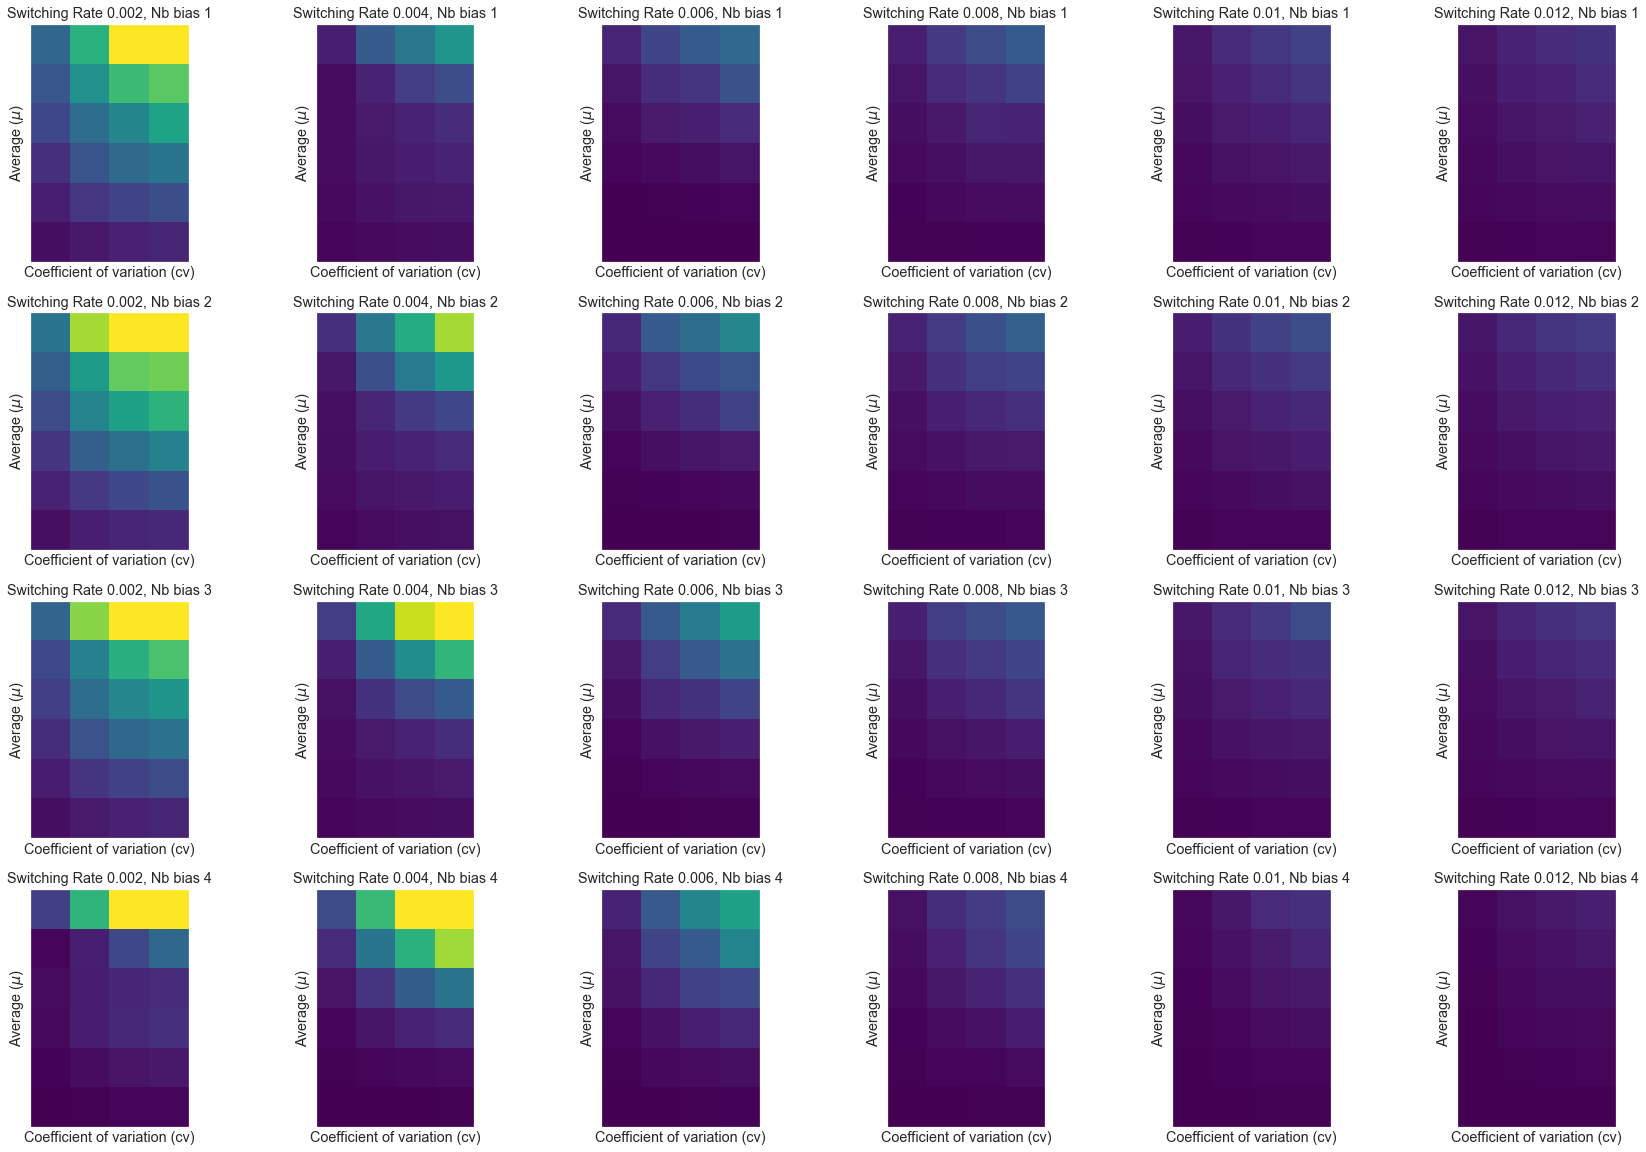

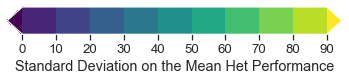

In [44]:
import seaborn as sns
import cv2
SCALE = 10
set_size(8, 4)
sns.set(font_scale=1.2)

def show(img, **kwargs):
    img = np.array(img)
    plt.imshow(img, **kwargs)

def performances_to_heatmap(performances):
    #mus = np.sort(np.unique([m for m,s in performances.keys()]))
    mus = np.sort(np.unique([m for m,s in performances.keys()]))[::-1]
    stds = np.sort(np.unique([s for m,s in performances.keys()]))
    #stds = np.sort(np.unique([s for m,s in performances.keys()]))[::-1]

    heatmap = np.zeros((len(mus), len(stds)))

    for mui, mu in enumerate(mus):
        for stdi, std in enumerate(stds):
            perf = performances[(mu, std)]

            if perf is not None and perf is not np.nan:
                heatmap[mui, stdi] = perf

    return heatmap, mus, stds

#nb_switch = 2
#nb_bias = 4

#set_size(12, 12)

#for si, nb_switch in enumerate([2, 4, 6]):
    #for bi, nb_bias in enumerate([1, 2, 3, 4]):
        #plt.subplot(4, 3, si + 1 + bi * 3)
        #performances = get_performances(nb_switch, nb_bias)


#set_size(16, 16)

#for si, nb_switch in enumerate([2, 4, 6, 8]):
    #for bi, nb_bias in enumerate([1, 2, 3, 4]):
        #plt.subplot(4, 4, si + 1 + bi * 4)
        #performances = get_performances(nb_switch, nb_bias)
        
set_size(24, 24)
T = 2000

#for si, nb_switch in enumerate([4, 6, 8, 10, 12, 14]):
for si, nb_switch in enumerate([4, 8, 12, 16, 20, 24]):
#for si, nb_switch in enumerate([0.002, 0.003, 0.004, 0.005, 0.006, 0.007]):
    for bi, nb_bias in enumerate([1, 2, 3, 4]):
        plt.subplot(6, 6, si + 1 + bi * 6)
        performances = get_performances(nb_switch, nb_bias)

        h, xs, ys = performances_to_heatmap(performances)
        #h = cv2.resize(h, (2048, 2048), interpolation=cv2.INTER_CUBIC)
        show(h, cmap='viridis', vmin=0, vmax=100)
        plt.xlabel('Coefficient of variation (cv)')
        plt.ylabel('Average ($\mu$)')
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.title(f"Switching Rate {round(nb_switch/T, 3)}, Nb bias {nb_bias}")

plt.gcf().patch.set_facecolor('white')
plt.tight_layout()
#plt.savefig('C:/Users/aless/OneDrive/Desktop/TESI/immagini paper cogsci/immagine.png', dpi=300, bbox_inches='tight', pad_inches=0.5, facecolor=fig.get_facecolor())
plt.show()

fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5, hspace = 0.9)

cmap = plt.get_cmap('viridis')
bounds = list(range(0, 100, 10))
norm = mpl.colors.BoundaryNorm(bounds, cmap.N, extend='both')

#fig, ax = plt.subplots(figsize=(10, 1))
fig.patch.set_facecolor('white')
fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             cax=ax, orientation='horizontal',
             label="Standard Deviation on the Mean Het Performance")
#fig.savefig('C:/Users/aless/OneDrive/Desktop/TESI/immagini paper cogsci/immagine.png', dpi=300, bbox_inches='tight', pad_inches=0.5, facecolor=fig.get_facecolor())

# Mostra il grafico se necessario
plt.show()

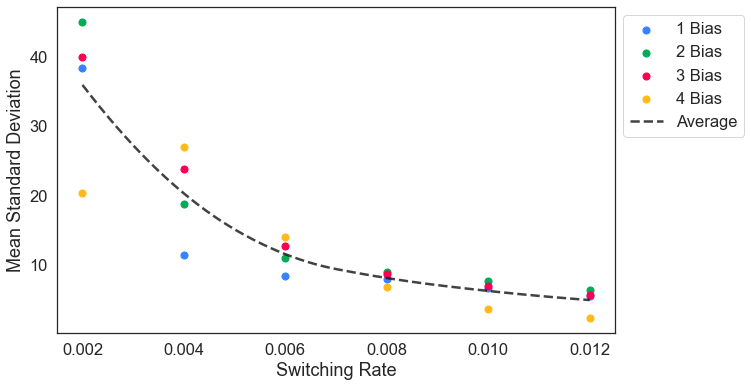

In [46]:
set_size(10, 6)
#sns.set(font_scale=1.2)
sns.set(font_scale=1.5)
sns.set_style("white")

T = 2000
points = []

for bi, nb_bias in enumerate([1, 2, 3, 4]):
    curve = []
    #for si, nb_switch in enumerate([4, 6, 8, 10, 12, 14]):
    for si, nb_switch in enumerate([4, 8, 12, 16, 20, 24]):
    #for si, nb_switch in enumerate([2, 4, 6]):
        performances = get_performances(nb_switch, nb_bias)
        h, _, _ = performances_to_heatmap(performances)
        h[h < 0.0] = np.nan
        #h[h < 1] = np.nan
        mean_perf = np.nanmean(h)

        if nb_switch == 24:
        #if nb_switch == 6:
            l = f"{nb_bias} Bias"
        else:
            l = None

        plt.scatter(round(nb_switch/T,3), mean_perf, color=cmaps[bi](1.0), s=50, label=l)
        points.append((round(nb_switch/T,3), mean_perf))
        curve.append((round(nb_switch/T,3), mean_perf))
  #plt.plot(*zip(*curve), color=plt.cm.viridis(nb_bias/4.0), linewidth=1.0, linestyle="--", alpha=0.4)

plt.xlabel('Switching Rate')
plt.ylabel('Mean Standard Deviation')
#plt.xticks([0.002, 0.003, 0.004, 0.005, 0.006, 0.007])
plt.xticks([0.002, 0.004, 0.006, 0.008, 0.01, 0.012])
#plt.xticks([4, 6, 8, 10, 12, 14])
#plt.xticks([2, 4, 6])


points = np.array(points)
avg = [np.mean(points[0::6, 1]), np.mean(points[1::6, 1]), np.mean(points[2::6, 1]), np.mean(points[3::6, 1]), np.mean(points[4::6, 1]), np.mean(points[5::6, 1])]
#avg = [np.mean(points[0::4, 1]), np.mean(points[1::4, 1]), np.mean(points[2::4, 1]), np.mean(points[3::4, 1])]
#avg = [np.mean(points[0::3, 1]), np.mean(points[1::3, 1]), np.mean(points[2::3, 1])]

#xx, yy = smooth([0.002, 0.003, 0.004, 0.005, 0.006, 0.007], avg)
xx, yy = smooth([0.002, 0.004, 0.006, 0.008, 0.01, 0.012], avg)
#xx, yy = smooth([4, 6, 8, 10, 12, 14], avg)
#xx, yy = smooth([2, 4, 6], avg)
#plt.plot(xx, yy, color="#EC407A", linewidth=3.0, label="Average", linestyle="--", alpha=0.8)
plt.plot(xx, yy, color="#131313", linewidth=2.5, label="Average", linestyle="--", alpha=0.8)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
#plt.legend()
#plt.savefig('C:/Users/aless/OneDrive/Desktop/TESI/immagini paper cogsci/immagine.png', dpi=300, bbox_inches='tight', pad_inches=0.5, facecolor=fig.get_facecolor())
plt.show()

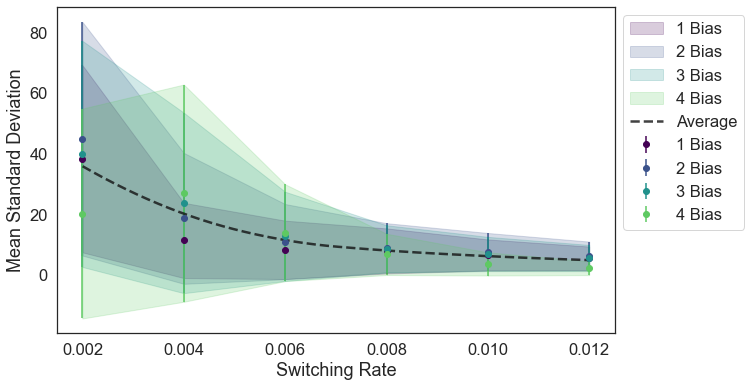

In [47]:
#set_size(8, 4)
#sns.set(font_scale=1.2)
set_size(10, 6)
sns.set(font_scale=1.5)
sns.set_style("white")

T = 2000
points = []
# Lists to store data for fill_between
x_fill = {1: [], 2: [], 3: [], 4: []}
y_fill = {1: [], 2: [], 3: [], 4: []}
upper_fill = {1: [], 2: [], 3: [], 4: []}
lower_fill = {1: [], 2: [], 3: [], 4: []}


for bi, nb_bias in enumerate([1, 2, 3, 4]):
    curve = []
    #for si, nb_switch in enumerate([4, 6, 8, 10, 12, 14]):
    for si, nb_switch in enumerate([4, 8, 12, 16, 20, 24]):
    #for si, nb_switch in enumerate([2, 4, 6]):
        performances = get_performances(nb_switch, nb_bias)
        h, _, _ = performances_to_heatmap(performances)
        h[h < 0.0] = np.nan
        #h[h < 1] = np.nan
        mean_perf = np.nanmean(h)

        if nb_switch == 24:
        #if nb_switch == 6:
            l = f"{nb_bias} Bias"
        else:
            l = None
        
        std_dev = np.nanstd(h)
        
        # Append data for fill_between
        x_fill[nb_bias].append(round(nb_switch / T, 3))
        y_fill[nb_bias].append(mean_perf)
        upper_fill[nb_bias].append(mean_perf + std_dev)
        lower_fill[nb_bias].append(mean_perf - std_dev)
        
        # Plot data points
        #plt.plot(round(nb_switch / T, 3), mean_perf, 'o', color=plt.cm.viridis(bi / 4.0), label=l)
        #plt.scatter(round(nb_switch/T,3), mean_perf, color=cmaps[bi](1.0), s=50, label=l)
        plt.fill_between([round(nb_switch / T, 3)], [mean_perf - std_dev], [mean_perf + std_dev], color=plt.cm.viridis(bi / 4.0), alpha=0.2)
        plt.errorbar(round(nb_switch / T, 3), mean_perf, yerr=std_dev, fmt='o', color=plt.cm.viridis(bi / 4.0), label=l)
        #plt.fill_between([round(nb_switch / T, 3)], [mean_perf - std_dev], [mean_perf + std_dev], color=plt.cm.viridis(bi / 4.0), alpha=0.2)
        points.append((round(nb_switch/T,3), mean_perf))
        curve.append((round(nb_switch/T,3), mean_perf))
  #plt.plot(*zip(*curve), color=plt.cm.viridis(nb_bias/4.0), linewidth=1.0, linestyle="--", alpha=0.4)

plt.xlabel('Switching Rate')
plt.ylabel('Mean Standard Deviation')
#plt.xticks([0.002, 0.003, 0.004, 0.005, 0.006, 0.007])
plt.xticks([0.002, 0.004, 0.006, 0.008, 0.01, 0.012])
#plt.xticks([4, 6, 8, 10, 12, 14])
#plt.xticks([2, 4, 6])


points = np.array(points)
avg = [np.mean(points[0::6, 1]), np.mean(points[1::6, 1]), np.mean(points[2::6, 1]), np.mean(points[3::6, 1]), np.mean(points[4::6, 1]), np.mean(points[5::6, 1])]
#avg = [np.mean(points[0::4, 1]), np.mean(points[1::4, 1]), np.mean(points[2::4, 1]), np.mean(points[3::4, 1])]
#avg = [np.mean(points[0::3, 1]), np.mean(points[1::3, 1]), np.mean(points[2::3, 1])]

#xx, yy = smooth([0.002, 0.003, 0.004, 0.005, 0.006, 0.007], avg)
xx, yy = smooth([0.002, 0.004, 0.006, 0.008, 0.01, 0.012], avg)
# Use fill_between for each set of data
for nb_bias in [1, 2, 3, 4]:
    plt.fill_between(x_fill[nb_bias], upper_fill[nb_bias], lower_fill[nb_bias], color=plt.cm.viridis((nb_bias-1) / 4.0), alpha=0.2, label=f'{nb_bias} Bias')
#xx, yy = smooth([4, 6, 8, 10, 12, 14], avg)
#xx, yy = smooth([2, 4, 6], avg)
#plt.plot(xx, yy, color="#EC407A", linewidth=3.0, label="Average", linestyle="--", alpha=0.8)
plt.plot(xx, yy, color="#131313", linewidth=2.5, label="Average", linestyle="--", alpha=0.8)
#plt.fill_between(xx, np.subtract(yy, std_dev), np.add(yy, std_dev), color="#131313", alpha=0.2)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
#plt.savefig('C:/Users/aless/OneDrive/Desktop/TESI/immagini paper cogsci/immagine.png', dpi=300, bbox_inches='tight', pad_inches=0.5, facecolor=fig.get_facecolor())
plt.show()

### Absolute difference (hom vs mean het performance)

In [51]:
def set_size(w,h):
    """Set matplot figure size"""
    plt.rcParams["figure.figsize"] = [w,h]

def get_performances(nb_switch, nb_bias):
    
    f = f"C:/Users/aless/TESI/03.Data_new_solver/Hom_vs_Het_t_regular_4_to_24_saving_distrb/{nb_switch}_task_sw_{nb_bias}_biases.csv"  # name of the files
    d = pd.read_csv(f)

    mus = np.unique(d['mu'])    
    stds = np.unique(d['cv'])   # based on what we use for the simulation

    performances = {}

    for mu in mus:
        for std in stds:
            performances[(mu, std)] = get_performance(nb_switch, nb_bias, mu, std)

    return performances

def get_performance(nb_switch, nb_bias, mu = None, std = None):
    
    f = f"C:/Users/aless/TESI/03.Data_new_solver/Hom_vs_Het_t_regular_4_to_24_saving_distrb/{nb_switch}_task_sw_{nb_bias}_biases.csv"
    d = pd.read_csv(f)

    if mu is not None:
        d = d[d['mu'] == mu]
    if std is not None:
        d = d[d['cv'] == std]

    return np.mean(d['performance1_diff'])

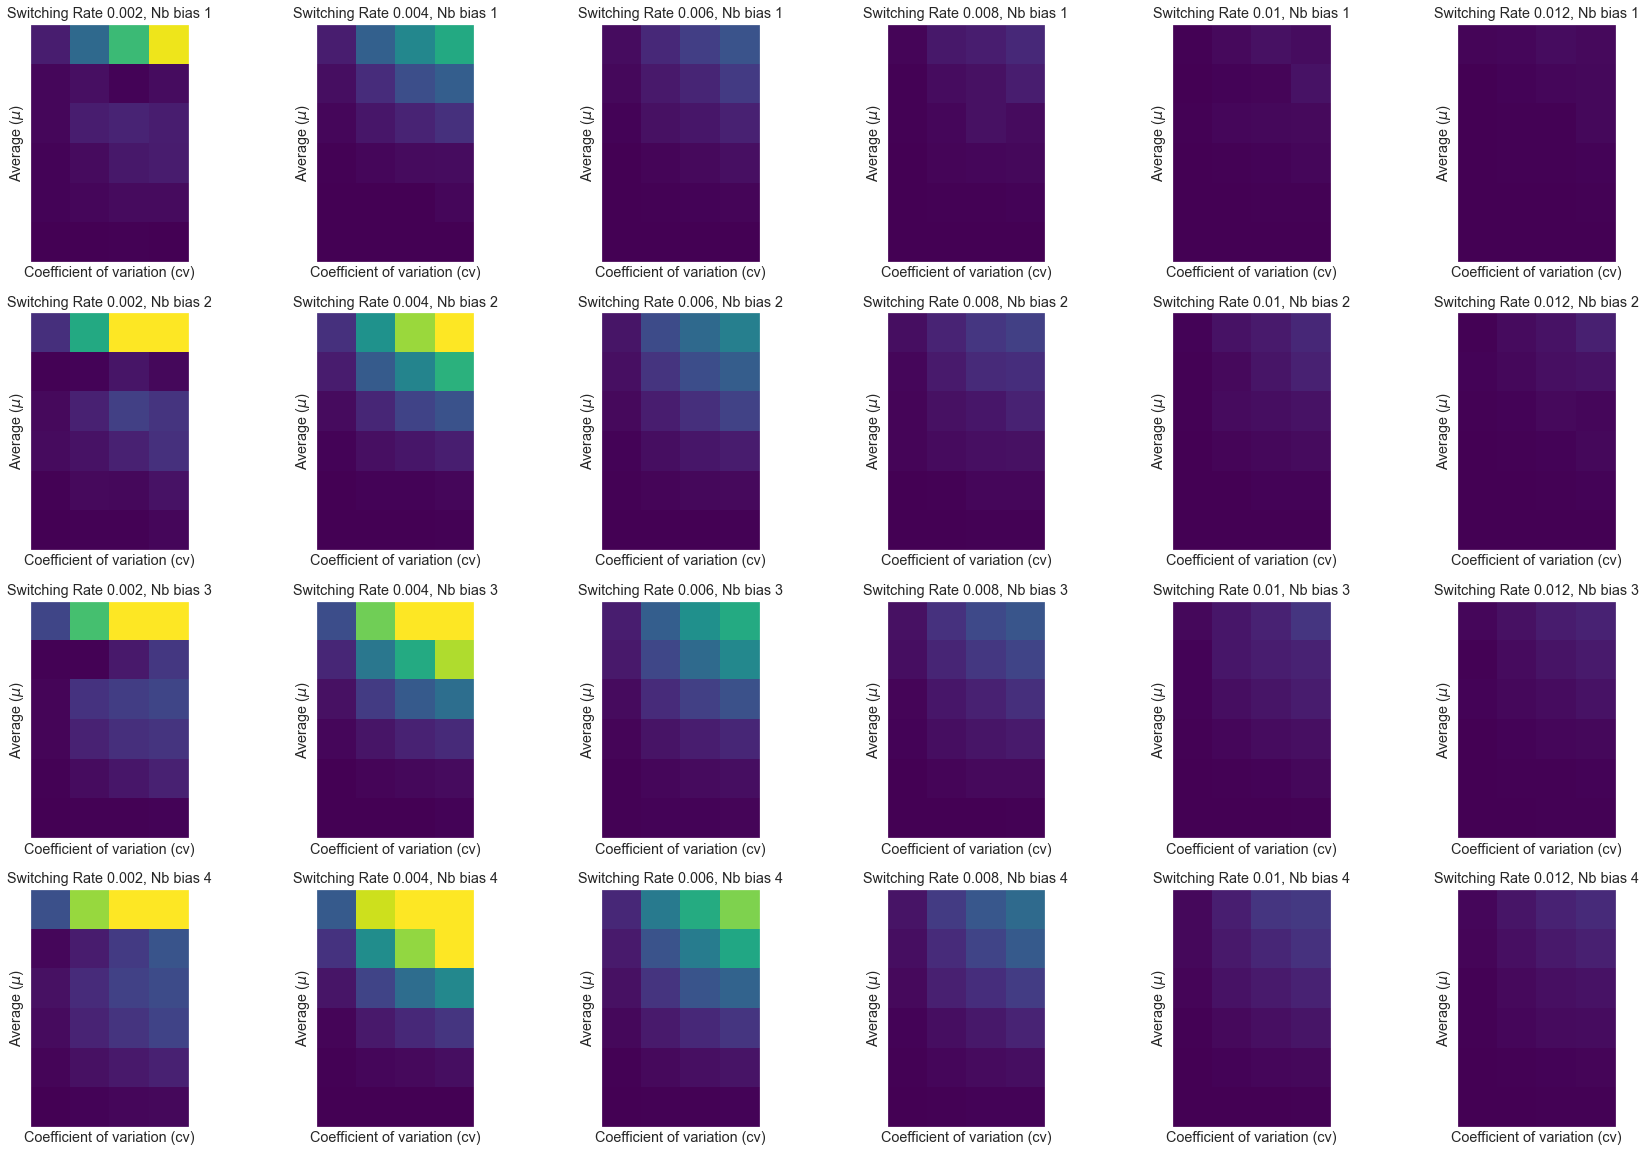

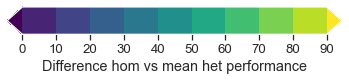

In [52]:
import seaborn as sns
import cv2
SCALE = 10
set_size(8, 4)
sns.set(font_scale=1.2)

def show(img, **kwargs):
    img = np.array(img)
    plt.imshow(img, **kwargs)

def performances_to_heatmap(performances):
    #mus = np.sort(np.unique([m for m,s in performances.keys()]))
    mus = np.sort(np.unique([m for m,s in performances.keys()]))[::-1]
    stds = np.sort(np.unique([s for m,s in performances.keys()]))
    #stds = np.sort(np.unique([s for m,s in performances.keys()]))[::-1]

    heatmap = np.zeros((len(mus), len(stds)))

    for mui, mu in enumerate(mus):
        for stdi, std in enumerate(stds):
            perf = performances[(mu, std)]

            if perf is not None and perf is not np.nan:
                heatmap[mui, stdi] = perf

    return heatmap, mus, stds

#nb_switch = 2
#nb_bias = 4

#set_size(12, 12)

#for si, nb_switch in enumerate([2, 4, 6]):
    #for bi, nb_bias in enumerate([1, 2, 3, 4]):
        #plt.subplot(4, 3, si + 1 + bi * 3)
        #performances = get_performances(nb_switch, nb_bias)


#set_size(16, 16)

#for si, nb_switch in enumerate([2, 4, 6, 8]):
    #for bi, nb_bias in enumerate([1, 2, 3, 4]):
        #plt.subplot(4, 4, si + 1 + bi * 4)
        #performances = get_performances(nb_switch, nb_bias)
        
set_size(24, 24)
T = 2000

#for si, nb_switch in enumerate([4, 6, 8, 10, 12, 14]):
for si, nb_switch in enumerate([4, 8, 12, 16, 20, 24]):
#for si, nb_switch in enumerate([0.002, 0.003, 0.004, 0.005, 0.006, 0.007]):
    for bi, nb_bias in enumerate([1, 2, 3, 4]):
        plt.subplot(6, 6, si + 1 + bi * 6)
        performances = get_performances(nb_switch, nb_bias)

        h, xs, ys = performances_to_heatmap(performances)
        #h = cv2.resize(h, (2048, 2048), interpolation=cv2.INTER_CUBIC)
        show(h, cmap='viridis', vmin=0, vmax=100)
        plt.xlabel('Coefficient of variation (cv)')
        plt.ylabel('Average ($\mu$)')
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.title(f"Switching Rate {round(nb_switch/T, 3)}, Nb bias {nb_bias}")

plt.gcf().patch.set_facecolor('white')
plt.tight_layout()
#plt.savefig('C:/Users/aless/OneDrive/Desktop/TESI/immagini paper cogsci/immagine.png', dpi=300, bbox_inches='tight', pad_inches=0.5, facecolor=fig.get_facecolor())
plt.show()

fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5, hspace = 0.9)

cmap = plt.get_cmap('viridis')
bounds = list(range(0, 100, 10))
norm = mpl.colors.BoundaryNorm(bounds, cmap.N, extend='both')

#fig, ax = plt.subplots(figsize=(10, 1))
fig.patch.set_facecolor('white')
fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             cax=ax, orientation='horizontal',
             label="Difference hom vs mean het performance")
#fig.savefig('C:/Users/aless/OneDrive/Desktop/TESI/immagini paper cogsci/immagine.png', dpi=300, bbox_inches='tight', pad_inches=0.5, facecolor=fig.get_facecolor())

# Mostra il grafico se necessario
plt.show()

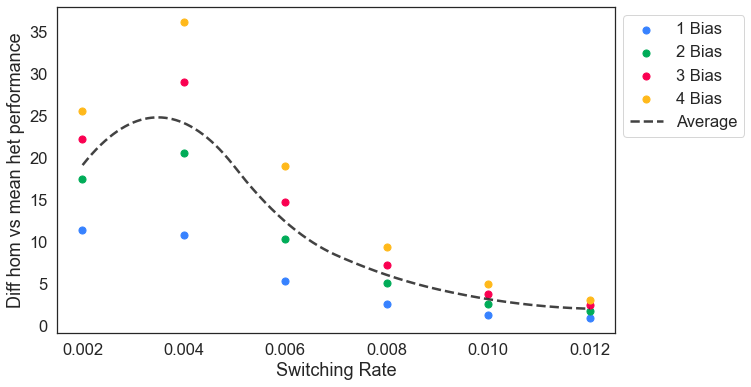

In [53]:
set_size(10, 6)
#sns.set(font_scale=1.2)
sns.set(font_scale=1.5)
sns.set_style("white")

T = 2000
points = []

for bi, nb_bias in enumerate([1, 2, 3, 4]):
    curve = []
    #for si, nb_switch in enumerate([4, 6, 8, 10, 12, 14]):
    for si, nb_switch in enumerate([4, 8, 12, 16, 20, 24]):
    #for si, nb_switch in enumerate([2, 4, 6]):
        performances = get_performances(nb_switch, nb_bias)
        h, _, _ = performances_to_heatmap(performances)
        h[h < 0.0] = np.nan
        #h[h < 1] = np.nan
        mean_perf = np.nanmean(h)

        if nb_switch == 24:
        #if nb_switch == 6:
            l = f"{nb_bias} Bias"
        else:
            l = None

        plt.scatter(round(nb_switch/T,3), mean_perf, color=cmaps[bi](1.0), s=50, label=l)
        points.append((round(nb_switch/T,3), mean_perf))
        curve.append((round(nb_switch/T,3), mean_perf))
  #plt.plot(*zip(*curve), color=plt.cm.viridis(nb_bias/4.0), linewidth=1.0, linestyle="--", alpha=0.4)

plt.xlabel('Switching Rate')
plt.ylabel('Diff hom vs mean het performance')
#plt.xticks([0.002, 0.003, 0.004, 0.005, 0.006, 0.007])
plt.xticks([0.002, 0.004, 0.006, 0.008, 0.01, 0.012])
#plt.xticks([4, 6, 8, 10, 12, 14])
#plt.xticks([2, 4, 6])


points = np.array(points)
avg = [np.mean(points[0::6, 1]), np.mean(points[1::6, 1]), np.mean(points[2::6, 1]), np.mean(points[3::6, 1]), np.mean(points[4::6, 1]), np.mean(points[5::6, 1])]
#avg = [np.mean(points[0::4, 1]), np.mean(points[1::4, 1]), np.mean(points[2::4, 1]), np.mean(points[3::4, 1])]
#avg = [np.mean(points[0::3, 1]), np.mean(points[1::3, 1]), np.mean(points[2::3, 1])]

#xx, yy = smooth([0.002, 0.003, 0.004, 0.005, 0.006, 0.007], avg)
xx, yy = smooth([0.002, 0.004, 0.006, 0.008, 0.01, 0.012], avg)
#xx, yy = smooth([4, 6, 8, 10, 12, 14], avg)
#xx, yy = smooth([2, 4, 6], avg)
#plt.plot(xx, yy, color="#EC407A", linewidth=3.0, label="Average", linestyle="--", alpha=0.8)
plt.plot(xx, yy, color="#131313", linewidth=2.5, label="Average", linestyle="--", alpha=0.8)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
#plt.legend()
#plt.savefig('C:/Users/aless/OneDrive/Desktop/TESI/immagini paper cogsci/immagine.png', dpi=300, bbox_inches='tight', pad_inches=0.5, facecolor=fig.get_facecolor())
plt.show()

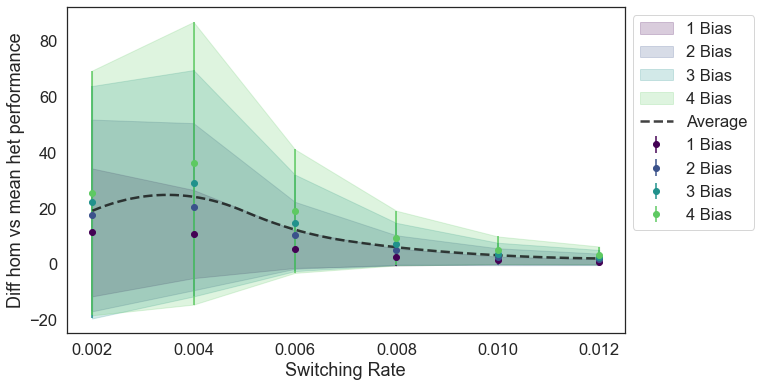

In [54]:
#set_size(8, 4)
#sns.set(font_scale=1.2)
set_size(10, 6)
sns.set(font_scale=1.5)
sns.set_style("white")

T = 2000
points = []
# Lists to store data for fill_between
x_fill = {1: [], 2: [], 3: [], 4: []}
y_fill = {1: [], 2: [], 3: [], 4: []}
upper_fill = {1: [], 2: [], 3: [], 4: []}
lower_fill = {1: [], 2: [], 3: [], 4: []}


for bi, nb_bias in enumerate([1, 2, 3, 4]):
    curve = []
    #for si, nb_switch in enumerate([4, 6, 8, 10, 12, 14]):
    for si, nb_switch in enumerate([4, 8, 12, 16, 20, 24]):
    #for si, nb_switch in enumerate([2, 4, 6]):
        performances = get_performances(nb_switch, nb_bias)
        h, _, _ = performances_to_heatmap(performances)
        h[h < 0.0] = np.nan
        #h[h < 1] = np.nan
        mean_perf = np.nanmean(h)

        if nb_switch == 24:
        #if nb_switch == 6:
            l = f"{nb_bias} Bias"
        else:
            l = None
        
        std_dev = np.nanstd(h)
        
        # Append data for fill_between
        x_fill[nb_bias].append(round(nb_switch / T, 3))
        y_fill[nb_bias].append(mean_perf)
        upper_fill[nb_bias].append(mean_perf + std_dev)
        lower_fill[nb_bias].append(mean_perf - std_dev)
        
        # Plot data points
        #plt.plot(round(nb_switch / T, 3), mean_perf, 'o', color=plt.cm.viridis(bi / 4.0), label=l)
        #plt.scatter(round(nb_switch/T,3), mean_perf, color=cmaps[bi](1.0), s=50, label=l)
        plt.fill_between([round(nb_switch / T, 3)], [mean_perf - std_dev], [mean_perf + std_dev], color=plt.cm.viridis(bi / 4.0), alpha=0.2)
        plt.errorbar(round(nb_switch / T, 3), mean_perf, yerr=std_dev, fmt='o', color=plt.cm.viridis(bi / 4.0), label=l)
        #plt.fill_between([round(nb_switch / T, 3)], [mean_perf - std_dev], [mean_perf + std_dev], color=plt.cm.viridis(bi / 4.0), alpha=0.2)
        points.append((round(nb_switch/T,3), mean_perf))
        curve.append((round(nb_switch/T,3), mean_perf))
  #plt.plot(*zip(*curve), color=plt.cm.viridis(nb_bias/4.0), linewidth=1.0, linestyle="--", alpha=0.4)

plt.xlabel('Switching Rate')
plt.ylabel('Diff hom vs mean het performance')
#plt.xticks([0.002, 0.003, 0.004, 0.005, 0.006, 0.007])
plt.xticks([0.002, 0.004, 0.006, 0.008, 0.01, 0.012])
#plt.xticks([4, 6, 8, 10, 12, 14])
#plt.xticks([2, 4, 6])


points = np.array(points)
avg = [np.mean(points[0::6, 1]), np.mean(points[1::6, 1]), np.mean(points[2::6, 1]), np.mean(points[3::6, 1]), np.mean(points[4::6, 1]), np.mean(points[5::6, 1])]
#avg = [np.mean(points[0::4, 1]), np.mean(points[1::4, 1]), np.mean(points[2::4, 1]), np.mean(points[3::4, 1])]
#avg = [np.mean(points[0::3, 1]), np.mean(points[1::3, 1]), np.mean(points[2::3, 1])]

#xx, yy = smooth([0.002, 0.003, 0.004, 0.005, 0.006, 0.007], avg)
xx, yy = smooth([0.002, 0.004, 0.006, 0.008, 0.01, 0.012], avg)
# Use fill_between for each set of data
for nb_bias in [1, 2, 3, 4]:
    plt.fill_between(x_fill[nb_bias], upper_fill[nb_bias], lower_fill[nb_bias], color=plt.cm.viridis((nb_bias-1) / 4.0), alpha=0.2, label=f'{nb_bias} Bias')
#xx, yy = smooth([4, 6, 8, 10, 12, 14], avg)
#xx, yy = smooth([2, 4, 6], avg)
#plt.plot(xx, yy, color="#EC407A", linewidth=3.0, label="Average", linestyle="--", alpha=0.8)
plt.plot(xx, yy, color="#131313", linewidth=2.5, label="Average", linestyle="--", alpha=0.8)
#plt.fill_between(xx, np.subtract(yy, std_dev), np.add(yy, std_dev), color="#131313", alpha=0.2)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
#plt.savefig('C:/Users/aless/OneDrive/Desktop/TESI/immagini paper cogsci/immagine.png', dpi=300, bbox_inches='tight', pad_inches=0.5, facecolor=fig.get_facecolor())
plt.show()

#### Comparison between st dev and abs(difference between hom and het performance)

In [48]:
def get_performances1(nb_switch, nb_bias):
    
    f = f"C:/Users/aless/TESI/03.Data_new_solver/Hom_vs_Het_t_regular_4_to_24_saving_distrb/{nb_switch}_task_sw_{nb_bias}_biases.csv"  # name of the files
    d = pd.read_csv(f)

    mus = np.unique(d['mu'])    
    stds = np.unique(d['cv'])   # based on what we use for the simulation

    performances = {}

    for mu in mus:
        for std in stds:
            performances[(mu, std)] = get_performance1(nb_switch, nb_bias, mu, std)

    return performances

def get_performance1(nb_switch, nb_bias, mu = None, std = None):
    
    f = f"C:/Users/aless/TESI/03.Data_new_solver/Hom_vs_Het_t_regular_4_to_24_saving_distrb/{nb_switch}_task_sw_{nb_bias}_biases.csv"
    d = pd.read_csv(f)

    if mu is not None:
        d = d[d['mu'] == mu]
    if std is not None:
        d = d[d['cv'] == std]

    return np.mean(d['performance1_diff'])

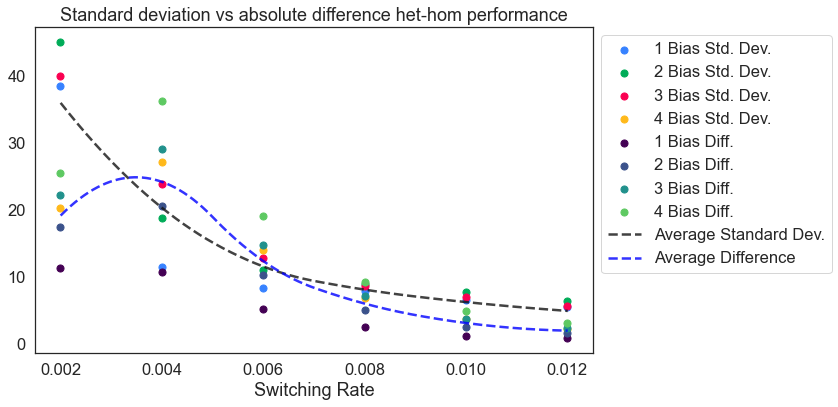

In [50]:
set_size(10, 6)
#sns.set(font_scale=1.2)
sns.set(font_scale=1.5)
sns.set_style("white")

T = 2000
points = []
points1 = []

#het case
for bi, nb_bias in enumerate([1, 2, 3, 4]):
    curve = []
    #for si, nb_switch in enumerate([4, 6, 8, 10, 12, 14]):
    for si, nb_switch in enumerate([4, 8, 12, 16, 20, 24]):
    #for si, nb_switch in enumerate([2, 4, 6]):
        performances = get_performances(nb_switch, nb_bias)
        h, _, _ = performances_to_heatmap(performances)
        h[h < 0.0] = np.nan
        #h[h < 1] = np.nan
        mean_perf = np.nanmean(h)

        if nb_switch == 24:
        #if nb_switch == 6:
            l = f"{nb_bias} Bias Std. Dev."
        else:
            l = None

        plt.scatter(round(nb_switch/T,3), mean_perf, color=cmaps[bi](1.0), s=50, label=l)
        points.append((round(nb_switch/T,3), mean_perf))
        curve.append((round(nb_switch/T,3), mean_perf))

#hom case
for bi, nb_bias in enumerate([1, 2, 3, 4]):
    curve1 = []
    #for si, nb_switch in enumerate([4, 6, 8, 10, 12, 14]):
    for si, nb_switch in enumerate([4, 8, 12, 16, 20, 24]):
    #for si, nb_switch in enumerate([2, 4, 6]):
        performances1 = get_performances1(nb_switch, nb_bias)
        h1, _, _ = performances_to_heatmap(performances1)
        h1[h1 < 0.0] = np.nan
        #h[h < 1] = np.nan
        mean_perf1 = np.nanmean(h1)

        if nb_switch == 24:
        #if nb_switch == 6:
            l = f"{nb_bias} Bias Diff."
        else:
            l = None

        plt.scatter(round(nb_switch/T,3), mean_perf1, color=plt.cm.viridis(bi / 4.0), s=50, label=l)
        points1.append((round(nb_switch/T,3), mean_perf1))
        curve1.append((round(nb_switch/T,3), mean_perf1))
  #plt.plot(*zip(*curve), color=plt.cm.viridis(nb_bias/4.0), linewidth=1.0, linestyle="--", alpha=0.4)

plt.xlabel('Switching Rate')
plt.title('Standard deviation vs absolute difference het-hom performance')
#plt.xticks([0.002, 0.003, 0.004, 0.005, 0.006, 0.007])
plt.xticks([0.002, 0.004, 0.006, 0.008, 0.01, 0.012])
#plt.xticks([4, 6, 8, 10, 12, 14])
#plt.xticks([2, 4, 6])

#het
points = np.array(points)
avg = [np.mean(points[0::6, 1]), np.mean(points[1::6, 1]), np.mean(points[2::6, 1]), np.mean(points[3::6, 1]), np.mean(points[4::6, 1]), np.mean(points[5::6, 1])]
#avg = [np.mean(points[0::4, 1]), np.mean(points[1::4, 1]), np.mean(points[2::4, 1]), np.mean(points[3::4, 1])]
#avg = [np.mean(points[0::3, 1]), np.mean(points[1::3, 1]), np.mean(points[2::3, 1])]

#hom
points1 = np.array(points1)
avg1 = [np.mean(points1[0::6, 1]), np.mean(points1[1::6, 1]), np.mean(points1[2::6, 1]), np.mean(points1[3::6, 1]), np.mean(points1[4::6, 1]), np.mean(points1[5::6, 1])]

#xx, yy = smooth([0.002, 0.003, 0.004, 0.005, 0.006, 0.007], avg)
xx, yy = smooth([0.002, 0.004, 0.006, 0.008, 0.01, 0.012], avg)
xx1, yy1 = smooth([0.002, 0.004, 0.006, 0.008, 0.01, 0.012], avg1)
#xx, yy = smooth([4, 6, 8, 10, 12, 14], avg)
#xx, yy = smooth([2, 4, 6], avg)
#plt.plot(xx, yy, color="#EC407A", linewidth=3.0, label="Average", linestyle="--", alpha=0.8)
plt.plot(xx, yy, color="#131313", linewidth=2.5, label="Average Standard Dev.", linestyle="--", alpha=0.8)
plt.plot(xx1, yy1, color="blue", linewidth=2.5, label="Average Difference", linestyle="--", alpha=0.8)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
#plt.legend()
#plt.savefig('C:/Users/aless/OneDrive/Desktop/TESI/immagini paper cogsci/immagine.png', dpi=300, bbox_inches='tight', pad_inches=0.5, facecolor=fig.get_facecolor())
plt.show()

## aggiungere mean het - hom con segno? Normalizzare su hom perf? 